# Data Storytelling and Preliminary Analysis

## Questions I Asked:

__1. How has the urban population (as percentage of total) changed over the timespan in the dataset?__
    
    In 1972, the average urban population (as percentage of total) was 43.16%. In 2002, it was 55.02%. When broken down by region, North America had the smallest change in urban population (as percentage of total), while Sub-Sarahan Africa had the largest. When analyzing countries grouped by income levels, we see a negative correlation with the already densely-populated high income countries exhibiting the smallest increase in the percentage of urban population, while the less densely-populated lower income countries exhibited the biggest increase in their percentages of urban population.
    
__2. How many countries are in each region? How many people in each region?__

    Countries per region:
    East Asia & Pacific: 36
    Europe & Central Asia: 56
    Latin America & Caribbean: 38
    Middle East & North Africa: 21
    North America: 3
    South Asia: 8
    Sub-Saharan Africa: 48
    
    People per region:
    East Asia & Pacific: 2,057,032,608
    Europe & Central Asia: 863,676,818
    Latin America & Caribbean: 540,028,983
    Middle East & North Africa: 323,928,401
    North America: 319,050,105
    South Asia: 1,429,513,552
    Sub-Saharan Africa: 700,219,447
    

__3. How many countries are in each income group? How many people in each group?__

    Countries per income group:
    High income: 72
    Low income: 31
    Lower middle income: 52
    Upper middle income: 55
    
    People per income group:
    High income: 1,061,860,535
    Low income: 446,026,847
    Lower middle income: 2,401,753,297
    Upper middle income: 2,323,809,235
    
__4. Are features like total population, urban population, and % urban population evenly distributed across all income groups and regions?__

    No, they are not. We can see clear divides between income groups and region when looking at these features.

__5. What is the general trend of features over the timespan in the dataset? Can these trends be defined by region or income group?__

    Please see 'Capstone 1: Statistical Analysis.pdf' for a more in-depth explanation.

## Initial Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython import display
from ipywidgets import interact, widgets
from time import sleep
from tqdm import tqdm
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from itertools import combinations

sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
# For progress bar on running code:
# for i in tqdm(range(1000)):
#     sleep(0.01)

In [3]:
# Read in the csv file containing the cleaned data
df = pd.read_csv('../data/Cleaned_Training_Set.csv', header=0)
df = df.drop('Unnamed: 0', axis=1)
df

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,Afghanistan,1972,South Asia,Low income,0.000000e+00,2.233065e+07,11644377.0,2.794796,17.853176,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690
1,Afghanistan,1973,South Asia,Low income,0.000000e+00,2.654146e+07,11966352.0,2.727531,18.346829,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479
2,Afghanistan,1974,South Asia,Low income,0.000000e+00,6.606462e+07,12273589.0,2.535101,18.817885,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500
3,Afghanistan,1975,South Asia,Low income,0.000000e+00,6.882184e+07,12551790.0,2.241357,19.244423,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033
4,Afghanistan,1976,South Asia,Low income,0.000000e+00,6.463635e+07,12806810.0,2.011378,19.635420,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,Zimbabwe,1998,Sub-Saharan Africa,Low income,3.574371e+06,2.922644e+06,12229500.0,1.513394,31.613028,67.0524,32.9476,8200173.0,4029327.0,2.750848,4438019
6467,Zimbabwe,1999,Sub-Saharan Africa,Low income,1.121581e+07,0.000000e+00,12384727.0,1.261295,32.014287,66.6472,33.3528,8254074.0,4130653.0,2.483614,4498365
6468,Zimbabwe,2000,Sub-Saharan Africa,Low income,2.259094e+07,1.635434e+06,12503652.0,0.955674,32.321706,66.2420,33.7580,8282669.0,4220983.0,2.163253,4558017
6469,Zimbabwe,2001,Sub-Saharan Africa,Low income,1.491629e+07,2.523939e+07,12586763.0,0.662494,32.536546,65.8216,34.1784,8284809.0,4301954.0,1.900130,4620705


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   country                                              6471 non-null   object 
 1   year                                                 6471 non-null   int64  
 2   World bank region                                    6471 non-null   object 
 3   World bank, 4 income groups 2017                     6471 non-null   object 
 4   Adjusted savings: mineral depletion (current US$)    6471 non-null   float64
 5   Adjusted savings: energy depletion (current US$)     6471 non-null   float64
 6   Population (Total)                                   6471 non-null   float64
 7   Population growth (annual %)                         6471 non-null   float64
 8   Population density (people per sq. km of land area)  6471 non-null  

In [5]:
df.describe()

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
count,6471.000000,6.471000e+03,6.471000e+03,6.471000e+03,6471.000000,6471.000000,6471.000000,6471.000000,6.471000e+03,6.471000e+03,6471.000000,6.471000e+03
mean,1987.033380,7.351437e+07,1.390014e+09,2.397868e+07,1.839108,283.575748,50.184895,49.815105,1.380235e+07,1.017633e+07,2.958250,1.147803e+07
std,8.949392,3.185078e+08,5.940447e+09,9.818894e+07,1.624394,1370.594462,24.869344,24.869344,7.074894e+07,3.169468e+07,2.543876,3.669893e+07
min,1972.000000,0.000000e+00,0.000000e+00,5.924000e+03,-7.597309,0.000000,0.000000,2.716400,0.000000e+00,1.757000e+03,-42.301838,2.140000e+03
25%,1979.000000,0.000000e+00,0.000000e+00,5.793925e+05,0.744508,19.043229,30.845400,29.187300,2.436050e+05,2.284950e+05,1.232784,2.664490e+05
50%,1987.000000,0.000000e+00,0.000000e+00,4.359166e+06,1.842203,56.593926,50.948800,49.051200,2.100014e+06,1.693451e+06,2.710241,1.975930e+06
75%,1995.000000,9.529645e+06,2.182143e+08,1.337768e+07,2.721474,139.962512,70.812700,69.154600,6.770802e+06,6.337645e+06,4.332735,6.912087e+06
max,2002.000000,5.345889e+09,1.218202e+11,1.280400e+09,17.107347,16326.500000,97.283600,100.000000,8.360900e+08,4.934021e+08,20.196932,5.957315e+08


## Investigating the 0's

In [6]:
# We want to investigate the data points where anything besides 'Adjusted savings...' is 0
df.loc[df['Population density (people per sq. km of land area)'].idxmin()]

country                                                       South Sudan
year                                                                 1972
World bank region                                      Sub-Saharan Africa
World bank, 4 income groups 2017                               Low income
Adjusted savings: mineral depletion (current US$)                       0
Adjusted savings: energy depletion (current US$)                        0
Population (Total)                                            3.82378e+06
Population growth (annual %)                                      2.38617
Population density (people per sq. km of land area)                     0
Rural population (% of total population)                          91.3898
Urban population (% of total)                                      8.6102
Rural population                                              3.49455e+06
Urban population                                                   329235
Urban population growth (annual %)    

In [7]:
df.loc[df['Rural population (% of total population)'].idxmin()]

country                                                      Bermuda
year                                                            1972
World bank region                                      North America
World bank, 4 income groups 2017                         High income
Adjusted savings: mineral depletion (current US$)                  0
Adjusted savings: energy depletion (current US$)                   0
Population (Total)                                             54200
Population growth (annual %)                               -0.732601
Population density (people per sq. km of land area)             1084
Rural population (% of total population)                           0
Urban population (% of total)                                    100
Rural population                                                   0
Urban population                                               54200
Urban population growth (annual %)                         -0.735297
Urban population 5 years in the fu

## Finding the Min and Max of Variables

In [8]:
# Minimum of each variable
print(df.min())

country                                                        Afghanistan
year                                                                  1972
World bank region                                      East Asia & Pacific
World bank, 4 income groups 2017                               High income
Adjusted savings: mineral depletion (current US$)                        0
Adjusted savings: energy depletion (current US$)                         0
Population (Total)                                                    5924
Population growth (annual %)                                      -7.59731
Population density (people per sq. km of land area)                      0
Rural population (% of total population)                                 0
Urban population (% of total)                                       2.7164
Rural population                                                         0
Urban population                                                      1757
Urban population growth (

In [9]:
# Maximum of each variable 
print(df.max())

country                                                           Zimbabwe
year                                                                  2002
World bank region                                       Sub-Saharan Africa
World bank, 4 income groups 2017                       Upper middle income
Adjusted savings: mineral depletion (current US$)              5.34589e+09
Adjusted savings: energy depletion (current US$)                1.2182e+11
Population (Total)                                              1.2804e+09
Population growth (annual %)                                       17.1073
Population density (people per sq. km of land area)                16326.5
Rural population (% of total population)                           97.2836
Urban population (% of total)                                          100
Rural population                                                8.3609e+08
Urban population                                               4.93402e+08
Urban population growth (

### Looking at Total Population

In [10]:
# We can find the data point where the total population is the maximum in our data set, and we can also view the 
# other stats tied to this observation (defined as country and year).
df.loc[df['Population (Total)'].idxmax()]

country                                                              China
year                                                                  2002
World bank region                                      East Asia & Pacific
World bank, 4 income groups 2017                       Upper middle income
Adjusted savings: mineral depletion (current US$)              2.20044e+09
Adjusted savings: energy depletion (current US$)               1.82854e+10
Population (Total)                                              1.2804e+09
Population growth (annual %)                                          0.67
Population density (people per sq. km of land area)                137.272
Rural population (% of total population)                            61.465
Urban population (% of total)                                       38.535
Rural population                                               7.86998e+08
Urban population                                               4.93402e+08
Urban population growth (

In [11]:
# We can clean it up so that we are only seeing the country, year, and value of the feature that we are interested in.
max_total_pop = (df.loc[df['Population (Total)'].idxmax()]['country'], 
                 df.loc[df['Population (Total)'].idxmax()]['year'], 
                 df.loc[df['Population (Total)'].idxmax()]['Population (Total)'])
max_total_pop

('China', 2002, 1280400000.0)

In [12]:
# Here we find the minimum
df.loc[df['Population (Total)'].idxmin()]

country                                                 Turks and Caicos Islands
year                                                                        1972
World bank region                                      Latin America & Caribbean
World bank, 4 income groups 2017                                     High income
Adjusted savings: mineral depletion (current US$)                              0
Adjusted savings: energy depletion (current US$)                               0
Population (Total)                                                          5924
Population growth (annual %)                                              2.9812
Population density (people per sq. km of land area)                      6.23579
Rural population (% of total population)                                 48.1112
Urban population (% of total)                                            51.8888
Rural population                                                            2850
Urban population            

In [13]:
# The country, year, and value of our feature minimum
min_total_pop = (df.loc[df['Population (Total)'].idxmin()]['country'], 
                 df.loc[df['Population (Total)'].idxmin()]['year'], 
                 df.loc[df['Population (Total)'].idxmin()]['Population (Total)'])
min_total_pop

('Turks and Caicos Islands', 1972, 5924.0)

In [14]:
# But what if we want the minimum of a certain year, such as 2002 for example?
df_2002 = df[df.year == 2002]
df_2002
df_2002.loc[df_2002['Population (Total)'].idxmin()]

country                                                             Tuvalu
year                                                                  2002
World bank region                                      East Asia & Pacific
World bank, 4 income groups 2017                       Upper middle income
Adjusted savings: mineral depletion (current US$)                        0
Adjusted savings: energy depletion (current US$)                         0
Population (Total)                                                    9530
Population growth (annual %)                                      0.621022
Population density (people per sq. km of land area)                317.667
Rural population (% of total population)                           53.1572
Urban population (% of total)                                      46.8428
Rural population                                                      5066
Urban population                                                      4464
Urban population growth (

In [15]:
# Here we save the total world population and total urban population for use later. 
world_pop_tot_2002 = df['Population (Total)'][df.year == 2002].sum()
print('The world population in 2002 was {:.0f}.'.format(world_pop_tot_2002))
urban_pop_2002 = df['Urban population'][df.year == 2002].sum()
print('The total urban population in 2002 was {:.0f}.'.format(urban_pop_2002))

The world population in 2002 was 6233449914.
The total urban population in 2002 was 2971287694.


In [16]:
total_pop_1972 = df[df['year'] == 1972].sort_values('Population (Total)', ascending=False)
total_pop_1972

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
1240,China,1972,East Asia & Pacific,Upper middle income,1.247649e+08,3.684485e+08,862030000.0,2.457357,92.418614,82.6000,17.4000,712036780.0,149993220.0,2.457357,171550310
2635,India,1972,South Asia,Lower middle income,9.884152e+07,1.521309e+08,580798773.0,2.262619,195.345327,79.6112,20.3888,462380873.0,118417900.0,3.816655,143676074
6148,United States,1972,North America,High income,7.294271e+08,8.433588e+09,209896000.0,1.070523,22.917012,26.3776,73.6224,55365527.0,154530473.0,1.084378,162287512
4802,Russian Federation,1972,Europe & Central Asia,Upper middle income,0.000000e+00,0.000000e+00,131909000.0,0.573246,8.048164,35.9466,64.0534,47416801.0,84492199.0,1.816158,92216733
2666,Indonesia,1972,East Asia & Pacific,Lower middle income,2.170118e+07,3.843327e+08,119974444.0,2.513896,66.226778,82.0306,17.9694,98415756.0,21558688.0,5.045479,27705778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,Northern Mariana Islands,1972,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,14142.0,3.482366,125.039130,25.7412,74.2588,3640.0,10502.0,6.348531,12700
4461,Palau,1972,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,11853.0,1.675993,37.510870,39.7158,60.2842,4708.0,7145.0,2.136017,7543
1085,Cayman Islands,1972,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,10137.0,5.620140,42.237500,0.0000,100.0000,0.0,10137.0,5.620140,13840
5993,Tuvalu,1972,East Asia & Pacific,Upper middle income,0.000000e+00,0.000000e+00,7459.0,1.078323,248.633333,76.4470,23.5530,5702.0,1757.0,4.243589,2140


In [17]:
total_pop_2002 = df[df['year'] == 2002].sort_values('Population (Total)', ascending=False)
total_pop_2002

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
1270,China,2002,East Asia & Pacific,Upper middle income,2.200444e+09,1.828545e+10,1.280400e+09,0.670000,137.271700,61.4650,38.5350,786997860.0,493402140.0,4.179688,595731464
2665,India,2002,South Asia,Lower middle income,1.086572e+09,5.968493e+09,1.076706e+09,1.610819,362.138216,71.7058,28.2942,772060452.0,304645271.0,2.725361,346720162
6178,United States,2002,North America,High income,6.282125e+08,4.174834e+10,2.876252e+08,0.927797,31.393550,20.2542,79.7458,58256182.0,229369011.0,1.340456,244888320
2696,Indonesia,2002,East Asia & Pacific,Lower middle income,1.625153e+09,9.120971e+09,2.150383e+08,1.436958,118.702719,56.4240,43.5760,121333202.0,93705083.0,3.259506,109785533
836,Brazil,2002,Latin America & Caribbean,Upper middle income,3.172173e+09,7.382715e+09,1.793938e+08,1.361313,21.206391,18.1512,81.8488,32562122.0,146831646.0,1.763347,158522837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Monaco,2002,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,3.265300e+04,0.882825,16326.500000,0.0000,100.0000,0.0,32653.0,0.882825,35013
4925,San Marino,2002,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,2.806400e+04,2.150233,467.733333,6.3284,93.6716,1776.0,26288.0,2.273831,28569
5992,Turks and Caicos Islands,2002,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,2.174000e+04,7.416459,22.884211,13.4076,86.5924,2915.0,18825.0,8.604118,26088
4491,Palau,2002,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,1.957500e+04,0.877401,42.554348,26.9422,73.0578,5274.0,14301.0,3.016874,16088


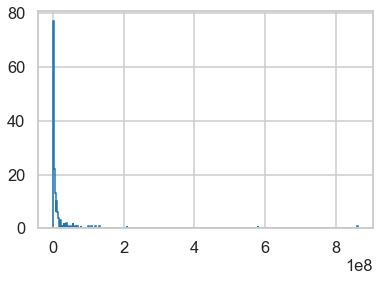

In [18]:
# Using a histogram, we can see how the total population is distributed, and we can also see 2 outliers above the
# 1,000,000,000 mark--China and India.
_ = plt.hist(df['Population (Total)'][df['year'] == 1972], histtype='step', bins=500)
plt.show()

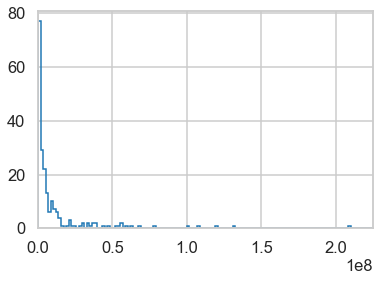

In [19]:
# Now let's view the distribution while excluding our 2 most extreme outliers
_ = plt.xlim(0, 2.25e8)
_ = plt.hist(df['Population (Total)'][df['year'] == 1972], histtype='step', bins=500)
plt.show()

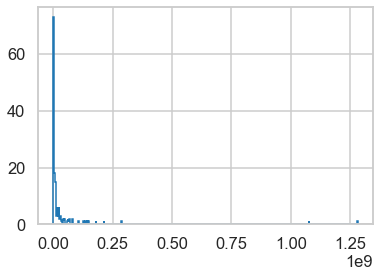

In [20]:
# Using a histogram, we can see how the total population is distributed, and we can also see 2 outliers above the
# 1,000,000,000 mark--China and India.
_ = plt.hist(df['Population (Total)'][df['year'] == 2002], histtype='step', bins=500)
plt.show()

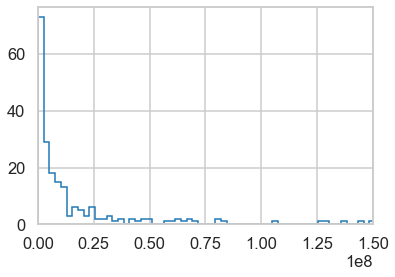

In [21]:
# Now let's view the distribution while excluding our 2 most extreme outliers
_ = plt.xlim(0, 1.5e8)
_ = plt.hist(df['Population (Total)'][df['year'] == 2002], histtype='step', bins=500)
plt.show()

In [22]:
# What percentage of our countries had a population below the mean in 1972?
scipy.stats.percentileofscore(df['Population (Total)'][df['year'] == 1972], 
                              np.mean(df['Population (Total)'][df['year'] == 1972]))

84.13461538461539

In [23]:
# What percentage of our countries had a population below the mean in 2002?
scipy.stats.percentileofscore(df['Population (Total)'][df['year'] == 2002], 
                              np.mean(df['Population (Total)'][df['year'] == 2002]))

83.33333333333333

Above, we see that over 80% of countries in our dataset fall below the mean in both 1972 and 2002. This shows us just how much our two largest outliers skew the mean.

### Looking at Urban Population

In [24]:
# Information about our data point where 'Urban population' is the maximum in the dataset
df.loc[df['Urban population'].idxmax()]

country                                                              China
year                                                                  2002
World bank region                                      East Asia & Pacific
World bank, 4 income groups 2017                       Upper middle income
Adjusted savings: mineral depletion (current US$)              2.20044e+09
Adjusted savings: energy depletion (current US$)               1.82854e+10
Population (Total)                                              1.2804e+09
Population growth (annual %)                                          0.67
Population density (people per sq. km of land area)                137.272
Rural population (% of total population)                            61.465
Urban population (% of total)                                       38.535
Rural population                                               7.86998e+08
Urban population                                               4.93402e+08
Urban population growth (

In [25]:
# Information about our data point where 'Urban population' is the minimum in the dataset
df.loc[df['Urban population'].idxmin()]

country                                                             Tuvalu
year                                                                  1972
World bank region                                      East Asia & Pacific
World bank, 4 income groups 2017                       Upper middle income
Adjusted savings: mineral depletion (current US$)                        0
Adjusted savings: energy depletion (current US$)                         0
Population (Total)                                                    7459
Population growth (annual %)                                       1.07832
Population density (people per sq. km of land area)                248.633
Rural population (% of total population)                            76.447
Urban population (% of total)                                       23.553
Rural population                                                      5702
Urban population                                                      1757
Urban population growth (

In [26]:
# Because the idxmin value for urban population in the dataset occurred in the year 1972, we can assume that in 
# the years following, the urban population of Tuvalu or any other country was 1757 or greater.

In [27]:
# What about the country with the minimum urban population in the last year of our dataset, in 2002?
df_2002 = df[df.year == 2002]
df_2002
df_2002.loc[df_2002['Urban population'].idxmin()]

country                                                             Tuvalu
year                                                                  2002
World bank region                                      East Asia & Pacific
World bank, 4 income groups 2017                       Upper middle income
Adjusted savings: mineral depletion (current US$)                        0
Adjusted savings: energy depletion (current US$)                         0
Population (Total)                                                    9530
Population growth (annual %)                                      0.621022
Population density (people per sq. km of land area)                317.667
Rural population (% of total population)                           53.1572
Urban population (% of total)                                      46.8428
Rural population                                                      5066
Urban population                                                      4464
Urban population growth (

In [28]:
urban_pop_1972 = df[df['year'] == 1972].sort_values('Urban population', ascending=False)
urban_pop_1972

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
6148,United States,1972,North America,High income,7.294271e+08,8.433588e+09,209896000.0,1.070523,22.917012,26.3776,73.6224,55365527.0,154530473.0,1.084378,162287512
1240,China,1972,East Asia & Pacific,Upper middle income,1.247649e+08,3.684485e+08,862030000.0,2.457357,92.418614,82.6000,17.4000,712036780.0,149993220.0,2.457357,171550310
2635,India,1972,South Asia,Lower middle income,9.884152e+07,1.521309e+08,580798773.0,2.262619,195.345327,79.6112,20.3888,462380873.0,118417900.0,3.816655,143676074
4802,Russian Federation,1972,Europe & Central Asia,Upper middle income,0.000000e+00,0.000000e+00,131909000.0,0.573246,8.048164,35.9466,64.0534,47416801.0,84492199.0,1.816158,92216733
2914,Japan,1972,East Asia & Pacific,High income,5.055072e+07,2.587987e+07,107188000.0,1.400779,292.384070,26.5874,73.4126,28498502.0,78689498.0,2.452157,86421562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,Cayman Islands,1972,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,10137.0,5.620140,42.237500,0.0000,100.0000,0.0,10137.0,5.620140,13840
4461,Palau,1972,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,11853.0,1.675993,37.510870,39.7158,60.2842,4708.0,7145.0,2.136017,7543
3376,Liechtenstein,1972,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,22153.0,1.946323,138.456250,81.5986,18.4014,18077.0,4076.0,1.807204,4474
5962,Turks and Caicos Islands,1972,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,5924.0,2.981204,6.235789,48.1112,51.8888,2850.0,3074.0,3.745260,3714


In [29]:
urban_pop_2002 = df[df['year'] == 2002].sort_values('Urban population', ascending=False)
urban_pop_2002

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
1270,China,2002,East Asia & Pacific,Upper middle income,2.200444e+09,1.828545e+10,1.280400e+09,0.670000,137.271700,61.4650,38.5350,786997860.0,493402140.0,4.179688,595731464
2665,India,2002,South Asia,Lower middle income,1.086572e+09,5.968493e+09,1.076706e+09,1.610819,362.138216,71.7058,28.2942,772060452.0,304645271.0,2.725361,346720162
6178,United States,2002,North America,High income,6.282125e+08,4.174834e+10,2.876252e+08,0.927797,31.393550,20.2542,79.7458,58256182.0,229369011.0,1.340456,244888320
836,Brazil,2002,Latin America & Caribbean,Upper middle income,3.172173e+09,7.382715e+09,1.793938e+08,1.361313,21.206391,18.1512,81.8488,32562122.0,146831646.0,1.763347,158522837
4832,Russian Federation,2002,Europe & Central Asia,Upper middle income,7.723306e+08,5.429729e+10,1.454080e+08,-0.390165,8.876660,26.8180,73.1820,38995526.0,106412507.0,-0.504882,104054827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,Faeroe Islands,2002,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,4.775100e+04,1.298418,34.205587,62.2854,37.7146,29742.0,18009.0,3.141738,19940
5403,St. Kitts and Nevis,2002,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,4.693400e+04,1.545958,180.515385,67.5020,32.4980,31681.0,15253.0,1.120792,16164
4491,Palau,2002,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,1.957500e+04,0.877401,42.554348,26.9422,73.0578,5274.0,14301.0,3.016874,16088
3406,Liechtenstein,2002,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,3.382100e+04,1.028302,211.381250,85.0296,14.9704,28758.0,5063.0,0.495002,5161


In [30]:
urban_pop_perc_1972 = df[df['year'] == 1972].sort_values('Urban population (% of total)', ascending=False)
urban_pop_perc_1972

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
1085,Cayman Islands,1972,Latin America & Caribbean,High income,0.0,0.000000e+00,10137.0,5.620140,42.237500,0.0000,100.0000,0.0,10137.0,5.620140,13840
5094,Singapore,1972,East Asia & Pacific,High income,0.0,0.000000e+00,2152400.0,1.852209,3212.537313,0.0000,100.0000,0.0,2152400.0,1.852209,2325300
651,Bermuda,1972,North America,High income,0.0,0.000000e+00,54200.0,-0.732601,1084.000000,0.0000,100.0000,0.0,54200.0,-0.735297,53400
3903,Monaco,1972,Europe & Central Asia,High income,0.0,7.453738e+07,24052.0,1.381527,12026.000000,0.0000,100.0000,0.0,24052.0,1.381527,25809
3469,"Macao SAR, China",1972,East Asia & Pacific,High income,0.0,0.000000e+00,254282.0,0.157823,9081.500000,2.6244,97.3756,6673.0,247609.0,0.334553,239201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,Malawi,1972,Sub-Saharan Africa,Low income,0.0,0.000000e+00,4812216.0,3.081393,51.041748,93.3074,6.6926,4490154.0,322062.0,7.977701,465425
899,Burkina Faso,1972,Sub-Saharan Africa,Low income,0.0,0.000000e+00,5825171.0,1.762899,21.290830,94.0136,5.9864,5476453.0,348718.0,3.791163,469055
4120,Nepal,1972,South Asia,Low income,0.0,0.000000e+00,12060891.0,2.133512,84.341895,95.6944,4.3056,11541597.0,519294.0,6.278204,717460
4833,Rwanda,1972,Sub-Saharan Africa,Low income,0.0,7.414104e+03,3983659.0,2.937785,161.477868,96.4856,3.5144,3843657.0,140002.0,7.633239,199273


In [31]:
urban_pop_perc_2002 = df[df['year'] == 2002].sort_values('Urban population (% of total)', ascending=False)
urban_pop_perc_2002

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
3499,"Macao SAR, China",2002,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,444150.0,1.376080,15862.500000,0.0000,100.0000,0.0,444150.0,1.376080,493206
681,Bermuda,2002,North America,High income,0.000000e+00,0.000000e+00,62912.0,0.652758,1258.240000,0.0000,100.0000,0.0,62912.0,0.650637,64888
3933,Monaco,2002,Europe & Central Asia,High income,0.000000e+00,0.000000e+00,32653.0,0.882825,16326.500000,0.0000,100.0000,0.0,32653.0,0.882825,35013
1115,Cayman Islands,2002,Latin America & Caribbean,High income,0.000000e+00,0.000000e+00,44742.0,3.236749,186.425000,0.0000,100.0000,0.0,44742.0,3.236749,51472
2572,"Hong Kong SAR, China",2002,East Asia & Pacific,High income,0.000000e+00,0.000000e+00,6744100.0,0.442847,6472.264875,0.0000,100.0000,0.0,6744100.0,0.442847,6916300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,Nepal,2002,South Asia,Low income,0.000000e+00,5.952135e+04,24102862.0,1.875105,168.139951,85.8958,14.1042,20703346.0,3399516.0,4.290576,4082146
4553,Papua New Guinea,2002,East Asia & Pacific,Lower middle income,3.654597e+08,2.509640e+08,5660267.0,2.527963,12.498933,87.0508,12.9492,4927308.0,732959.0,1.548854,800535
6054,Uganda,2002,Sub-Saharan Africa,Low income,0.000000e+00,0.000000e+00,25943441.0,3.352786,129.840554,87.4516,12.5484,22687954.0,3255487.0,5.228698,4305712
5868,Trinidad and Tobago,2002,Latin America & Caribbean,High income,0.000000e+00,1.603527e+09,1277723.0,0.421636,249.068811,88.6514,11.3486,1132719.0,145004.0,2.720034,165731


In [32]:
# What percentage of our countries had an urban population below the mean in 1972?
scipy.stats.percentileofscore(df['Urban population'][df['year'] == 1972], 
                              np.mean(df['Urban population'][df['year'] == 1972]))

82.6923076923077

In [33]:
# What percentage of our countries had an urban population below the mean in 2002?
scipy.stats.percentileofscore(df['Urban population'][df['year'] == 2002], 
                              np.mean(df['Urban population'][df['year'] == 2002]))

81.9047619047619

## Finding the Mean and Median

In [34]:
# Inspecting the average of each column in the dataset
df.mean() 

year                                                   1.987033e+03
Adjusted savings: mineral depletion (current US$)      7.351437e+07
Adjusted savings: energy depletion (current US$)       1.390014e+09
Population (Total)                                     2.397868e+07
Population growth (annual %)                           1.839108e+00
Population density (people per sq. km of land area)    2.835757e+02
Rural population (% of total population)               5.018490e+01
Urban population (% of total)                          4.981510e+01
Rural population                                       1.380235e+07
Urban population                                       1.017633e+07
Urban population growth (annual %)                     2.958250e+00
Urban population 5 years in the future                 1.147803e+07
dtype: float64

In [35]:
# Averages for the first year in the dataset
df_avg_1972 = df[df['year'] == 1972].mean()
df_avg_1972

year                                                   1.972000e+03
Adjusted savings: mineral depletion (current US$)      2.076421e+07
Adjusted savings: energy depletion (current US$)       1.151294e+08
Population (Total)                                     1.834937e+07
Population growth (annual %)                           2.185212e+00
Population density (people per sq. km of land area)    2.257981e+02
Rural population (% of total population)               5.684207e+01
Urban population (% of total)                          4.315793e+01
Rural population                                       1.155665e+07
Urban population                                       6.792712e+06
Urban population growth (annual %)                     3.917874e+00
Urban population 5 years in the future                 7.721631e+06
dtype: float64

In [36]:
# Averages for the final year of the dataset
df_avg_2002 = df[df['year'] == 2002].mean()
df_avg_2002

year                                                   2.002000e+03
Adjusted savings: mineral depletion (current US$)      9.769403e+07
Adjusted savings: energy depletion (current US$)       2.075808e+09
Population (Total)                                     2.968309e+07
Population growth (annual %)                           1.483484e+00
Population density (people per sq. km of land area)    3.501765e+02
Rural population (% of total population)               4.497555e+01
Urban population (% of total)                          5.502445e+01
Rural population                                       1.553411e+07
Urban population                                       1.414899e+07
Urban population growth (annual %)                     2.190933e+00
Urban population 5 years in the future                 1.580320e+07
dtype: float64

In [37]:
# use averages above to calculate percent growth of each feature over our 31-year timespan 
percent_change_df = (df_avg_2002 - df_avg_1972) / df_avg_1972
percent_change_df

year                                                    0.015213
Adjusted savings: mineral depletion (current US$)       3.704923
Adjusted savings: energy depletion (current US$)       17.030219
Population (Total)                                      0.617663
Population growth (annual %)                           -0.321126
Population density (people per sq. km of land area)     0.550839
Rural population (% of total population)               -0.208763
Urban population (% of total)                           0.274956
Rural population                                        0.344170
Urban population                                        1.082966
Urban population growth (annual %)                     -0.440785
Urban population 5 years in the future                  1.046614
dtype: float64

In [38]:
# Averages by region over our 31-year dataset observations
avg_by_region = df.groupby('World bank region').mean()
avg_by_region

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
World bank region,,,,,,,,,,,,
East Asia & Pacific,1987.000000,1.264668e+08,8.153348e+08,4.760223e+07,1.930137,697.498467,50.647315,49.352685,3.181446e+07,1.578777e+07,2.952824,1.858195e+07
Europe & Central Asia,1987.068102,1.774053e+07,1.158522e+09,1.470134e+07,0.694433,368.401804,38.781931,61.218069,4.963905e+06,9.737432e+06,1.192576,1.010434e+07
Latin America & Caribbean,1987.000000,1.151274e+08,8.709898e+08,1.105767e+07,1.679055,121.265863,44.327834,55.672166,3.421103e+06,7.636571e+06,2.441205,8.669953e+06
Middle East & North Africa,1987.157143,1.206376e+07,4.371660e+09,1.145419e+07,3.291377,143.159353,33.118671,66.881329,5.289811e+06,6.164379e+06,4.217016,7.243628e+06
North America,1987.000000,8.974487e+08,1.940805e+10,9.074519e+07,0.902324,392.764018,15.859559,84.140441,2.189972e+07,6.884547e+07,1.044027,7.366721e+07
South Asia,1987.000000,5.886494e+07,5.530591e+08,1.340514e+08,2.255708,281.912997,80.719571,19.280429,1.012543e+08,3.279715e+07,4.533796,3.837391e+07
Sub-Saharan Africa,1987.000000,4.221434e+07,2.501673e+08,9.985842e+06,2.593396,56.594774,71.922280,28.077720,7.239052e+06,2.746791e+06,4.734341,3.382479e+06


In [39]:
# Regional averages for the first year in the dataset
avg_by_region_1972 = df[df['year'] == 1972].groupby('World bank region').mean()
avg_by_region_1972

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
World bank region,,,,,,,,,,,,
East Asia & Pacific,1972.0,2.376767e+07,2.857678e+07,3.718566e+07,2.397581,533.174422,56.599411,43.400589,2.784846e+07,9.337198e+06,3.425587,1.076396e+07
Europe & Central Asia,1972.0,4.625100e+06,2.930498e+07,1.347123e+07,1.273324,317.883183,44.242091,55.757909,5.154608e+06,8.316621e+06,2.351236,8.915879e+06
Latin America & Caribbean,1972.0,2.583094e+07,5.943069e+07,7.927806e+06,2.029657,100.036301,51.034642,48.965358,3.291312e+06,4.636494e+06,3.003432,5.549579e+06
Middle East & North Africa,1972.0,9.821005e+05,4.303764e+08,7.393107e+06,4.149522,98.205651,42.020400,57.979600,4.123023e+06,3.270084e+06,5.778795,4.050156e+06
North America,1972.0,4.718819e+08,3.143533e+09,7.731461e+07,0.644431,369.778540,16.913600,83.086400,2.024129e+07,5.707332e+07,0.644361,6.011275e+07
South Asia,1972.0,1.235526e+07,2.577967e+07,9.363273e+07,2.471833,190.464194,86.137025,13.862975,7.555673e+07,1.807600e+07,6.165372,2.219639e+07
Sub-Saharan Africa,1972.0,1.444239e+07,1.674257e+07,6.394634e+06,2.424022,39.366668,79.847812,20.152188,5.104750e+06,1.289883e+06,5.860755,1.633897e+06


In [40]:
# Regional averages for the final year in the dataset
avg_by_region_2002 = df[df['year'] == 2002].groupby('World bank region').mean()
avg_by_region_2002

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
World bank region,,,,,,,,,,,,
East Asia & Pacific,2002.0,2.282995e+08,1.260494e+09,5.713979e+07,1.184017,912.941562,45.523444,54.476556,3.237388e+07,2.476591e+07,2.050313,2.882138e+07
Europe & Central Asia,2002.0,2.510077e+07,2.144065e+09,1.542280e+07,0.421066,409.453325,36.039121,63.960879,4.851956e+06,1.057084e+07,0.653415,1.086200e+07
Latin America & Caribbean,2002.0,1.797345e+08,1.529591e+09,1.421129e+07,1.425700,143.865287,38.254753,61.745247,3.388729e+06,1.082256e+07,1.955953,1.177693e+07
Middle East & North Africa,2002.0,1.354816e+07,6.217336e+09,1.542516e+07,2.403944,199.176435,27.150981,72.849019,6.246905e+06,9.178257e+06,2.835520,1.048877e+07
North America,2002.0,4.982455e+08,1.839586e+10,1.063500e+08,0.825896,431.027461,13.506200,86.493800,2.153717e+07,8.481287e+07,1.016630,9.045350e+07
South Asia,2002.0,1.358477e+08,9.865839e+08,1.786892e+08,2.049180,383.769324,75.647350,24.352650,1.287192e+08,4.996996e+07,3.887046,5.704741e+07
Sub-Saharan Africa,2002.0,2.490374e+07,3.896983e+08,1.458791e+07,2.537434,77.686792,64.964196,35.035804,9.805642e+06,4.782263e+06,3.784896,5.777149e+06


In [41]:
# use averages above to calculate each region's percent growth of each feature over our 31-year timespan 
percent_change_region = (avg_by_region_2002 - avg_by_region_1972) / avg_by_region_1972 * 100
percent_change_region

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
World bank region,,,,,,,,,,,,
East Asia & Pacific,1.521298,860.546555,4310.903900,53.660838,-50.616182,71.227561,-19.569049,25.520314,16.250166,165.239245,-40.147117,167.758211
Europe & Central Asia,1.521298,442.707537,7216.383222,14.486959,-66.931753,28.806224,-18.541098,14.711759,-5.871484,27.105041,-72.209717,21.827626
Latin America & Caribbean,1.521298,595.811007,2473.738953,79.258780,-29.756572,43.813082,-25.041597,26.099859,2.959807,133.421196,-34.876072,112.213080
Middle East & North Africa,1.521298,1279.508299,1344.627701,108.642492,-42.066971,102.815655,-35.386191,25.645950,51.512742,180.673445,-50.932329,158.971965
North America,1.521298,5.586906,485.196813,37.554900,28.158870,16.563676,-20.145918,4.101032,6.402134,48.603360,57.773435,50.473067
South Asia,1.521298,999.513177,3726.983779,90.840533,-17.098775,101.491586,-12.177893,75.666839,70.361049,176.443714,-36.953590,157.012131
Sub-Saharan Africa,1.521298,72.435071,2227.589029,128.127306,4.678667,97.341549,-18.639980,73.856085,92.088570,270.751676,-35.419644,253.581042


In [42]:
# Averages by income group over our 31-year dataset observations
avg_by_income = df.groupby('World bank, 4 income groups 2017').mean()
avg_by_income

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,1986.991925,9.752004e+07,1.999265e+09,1.330681e+07,1.437816,662.206600,29.307318,70.692682,3.489338e+06,9.817475e+06,1.892677,1.036966e+07
Low income,1987.000000,2.050616e+07,1.264559e+07,9.925165e+06,2.551663,63.464910,77.229266,22.770734,7.769303e+06,2.155862e+06,4.749218,2.616117e+06
Lower middle income,1987.073400,4.059258e+07,6.076786e+08,3.517837e+07,2.297258,84.450526,64.396218,35.603782,2.475782e+07,1.042056e+07,3.705377,1.220157e+07
Upper middle income,1987.069354,1.030992e+08,2.108849e+09,3.550253e+07,1.530527,96.832389,48.936307,51.063693,2.051394e+07,1.498859e+07,2.640003,1.730703e+07


From finding the averages of each income group over our 31-year span above, we notice several things. The average population is highest in "upper middle income" countries, followed by "lower middle income", "high income", and "low income" countries at the very bottom. Income and population growth (as a percentage) are inversely related with high income countries having the least growth and low income countries having the most. Population density is directly related to income, with high income countries being the most densely populated. Urban population percentage numbers have a similar correlation, with the rural population percentage being inversely related to income. Lower income countries have the highest urban population growth (as a percentage) while the already densely-populated higher income countries exhibit less urban growth.

In [43]:
# Income group averages for the first year in the dataset
avg_by_income_1972 = df[df['year'] == 1972].groupby('World bank, 4 income groups 2017').mean()
avg_by_income_1972

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,1972.0,3.465747e+07,2.162264e+08,1.178996e+07,1.973140,532.963769,34.797439,65.202561,3.574704e+06,8.215256e+06,2.943833,8.780447e+06
Low income,1972.0,1.079119e+07,7.434861e+05,6.620555e+06,2.384223,42.652421,83.310871,16.689129,5.512750e+06,1.107805e+06,5.627280,1.375458e+06
Lower middle income,1972.0,1.155035e+07,2.944195e+07,2.473574e+07,2.692289,59.207070,71.338961,28.661039,1.891741e+07,5.818327e+06,4.528595,7.061301e+06
Upper middle income,1972.0,1.666711e+07,1.269264e+08,2.779688e+07,1.874822,78.718869,57.348344,42.651656,1.871708e+07,9.079796e+06,3.658477,1.057670e+07


In [44]:
# Income group averages for the final year in the dataset
avg_by_income_2002 = df[df['year'] == 2002].groupby('World bank, 4 income groups 2017').mean()
avg_by_income_2002

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,2002.0,1.120868e+08,2.585977e+09,1.474806e+07,1.183136,813.479015,25.836592,74.163408,3.302989e+06,1.144507e+07,1.465171,1.215973e+07
Low income,2002.0,9.309332e+06,4.874037e+06,1.438796e+07,2.739996,89.724692,71.566277,28.433723,1.076186e+07,3.626105e+06,4.206807,4.381140e+06
Lower middle income,2002.0,7.293042e+07,1.035822e+09,4.618756e+07,1.663323,113.161926,58.424562,41.575438,3.039679e+07,1.579078e+07,2.617969,1.803753e+07
Upper middle income,2002.0,1.520822e+08,3.558464e+09,4.225108e+07,0.998422,114.558123,42.327244,57.672756,2.018357e+07,2.206750e+07,1.601057,2.489827e+07


In [45]:
# use averages above to calculate percent growth of each feature over our 31-year timespan with countries
# grouped by income level
percent_change_income = (avg_by_income_2002 - avg_by_income_1972) / avg_by_income_1972 * 100
percent_change_income

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,1.521298,223.413155,1095.958043,25.090020,-40.037920,52.633080,-25.751456,13.743091,-7.601055,39.314885,-50.229123,38.486461
Low income,1.521298,-13.732070,555.565317,117.322623,14.921979,110.362483,-14.097312,70.372717,95.217601,227.323484,-25.242619,218.522292
Lower middle income,1.521298,531.413282,3418.182392,86.724026,-38.218999,91.129077,-18.102870,45.059075,60.681550,171.397189,-42.190252,155.441999
Upper middle income,1.521298,812.469038,2703.565701,51.999376,-46.745757,45.528161,-26.192737,35.218096,7.835055,143.039655,-56.237049,135.406891


In [46]:
df.median()

year                                                   1.987000e+03
Adjusted savings: mineral depletion (current US$)      0.000000e+00
Adjusted savings: energy depletion (current US$)       0.000000e+00
Population (Total)                                     4.359166e+06
Population growth (annual %)                           1.842203e+00
Population density (people per sq. km of land area)    5.659393e+01
Rural population (% of total population)               5.094880e+01
Urban population (% of total)                          4.905120e+01
Rural population                                       2.100014e+06
Urban population                                       1.693451e+06
Urban population growth (annual %)                     2.710241e+00
Urban population 5 years in the future                 1.975930e+06
dtype: float64

In [47]:
med_by_region = df.groupby('World bank region').median()
med_by_region

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
World bank region,,,,,,,,,,,,
East Asia & Pacific,1987.0,0.000000e+00,0.000000e+00,1128016.5,1.891734,83.838068,53.1070,46.8930,416049.5,379891.5,2.840459,424279.5
Europe & Central Asia,1987.0,0.000000e+00,1.004977e+06,4815116.5,0.599128,85.493642,37.3652,62.6348,2076963.5,2817835.5,1.076216,2965894.0
Latin America & Caribbean,1987.0,0.000000e+00,0.000000e+00,2890648.5,1.732548,50.687225,47.2548,52.7452,1132337.5,1331475.0,2.527302,1611123.5
Middle East & North Africa,1987.0,0.000000e+00,1.157528e+09,4279405.5,2.851974,39.805531,30.6352,69.3648,927815.5,2785179.0,3.791706,3424101.5
North America,1987.0,8.665239e+08,6.773710e+09,26550000.0,0.954477,26.453768,22.5436,77.4564,6253799.0,20296201.0,1.110611,21965565.0
South Asia,1987.0,0.000000e+00,6.164621e+05,17616036.5,2.313502,194.765391,80.7581,19.2419,15053011.5,2856107.0,4.122767,2969993.5
Sub-Saharan Africa,1987.0,0.000000e+00,0.000000e+00,5417980.0,2.712966,28.179334,72.2156,27.7844,4235438.0,1053451.0,4.448955,1340160.0


In [48]:
med_by_income = df.groupby('World bank, 4 income groups 2017').median()
med_by_income

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,1987.0,0.000000,0.00000,1996351.0,0.921360,111.786112,26.3470,73.6530,424683.0,1554728.0,1.340456,1605474.0
Low income,1987.0,0.000000,0.00000,6470628.0,2.655961,31.489539,78.5404,21.4596,5209206.0,1272425.0,4.508463,1569852.0
Lower middle income,1987.0,0.000000,3862.19346,5849980.0,2.426006,48.259567,64.5829,35.4171,3412564.5,2258392.0,3.705363,2570119.5
Upper middle income,1987.0,3053.244684,0.00000,3566605.0,1.576877,50.002075,48.6140,51.3860,1831012.0,1849315.0,2.530375,2146159.0


In [49]:
# Find quantiles from 
df.quantile([0.025, 0.975])

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0.025,1972.0,0.000000e+00,0.000000e+00,25502.5,-0.793132,1.907862,1.78485,9.45850,2252.75,14102.75,-0.812936,15296.5
0.975,2002.0,9.073318e+08,1.348437e+10,138234688.0,5.165273,1084.347656,90.54150,98.21515,61164085.25,89929277.00,8.408388,96787145.5


## Other Stats

In [50]:
# We can find the variance of each feature over the 31-year span by using
df.var(ddof=0)
# 0 degrees of freedom because we are assuming we know the stats of the entire population of observations during the
# time period 2971-2002. Realisticaly, we have 210 of the 214 countries from the original dataset, and we are missing
# a few years from 3 different countries. However, since we have the overwhelming majority of possible observations in
# this dataset, we will assume that it is an accurate representation.

year                                                   8.007924e+01
Adjusted savings: mineral depletion (current US$)      1.014316e+17
Adjusted savings: energy depletion (current US$)       3.528346e+19
Population (Total)                                     9.639577e+15
Population growth (annual %)                           2.638248e+00
Population density (people per sq. km of land area)    1.878239e+06
Rural population (% of total population)               6.183887e+02
Urban population (% of total)                          6.183887e+02
Rural population                                       5.004639e+15
Urban population                                       1.004397e+15
Urban population growth (annual %)                     6.470303e+00
Urban population 5 years in the future                 1.346603e+15
dtype: float64

In [51]:
# Variance by income group
df.groupby('World bank, 4 income groups 2017').var(ddof=0)

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,80.058257,1.788754e+17,6.968846e+19,1.191952e+15,3.640346,5.207422e+06,413.258660,413.258660,7.401129e+13,6.810993e+14,4.928700,7.662305e+14
Low income,80.000000,4.109070e+15,3.416930e+15,1.074099e+14,2.201491,5.560134e+03,143.600888,143.600888,7.220574e+13,7.158643e+12,5.056661,9.348049e+12
Lower middle income,80.116946,1.863233e+16,3.117358e+18,1.380130e+16,1.569748,1.557590e+04,275.594301,275.594301,7.634752e+15,9.432242e+14,7.614493,1.261906e+15
Upper middle income,80.110780,1.285196e+17,3.764879e+19,2.178466e+16,1.777035,1.684765e+04,298.844077,298.844077,1.152431e+16,1.997414e+15,4.275222,2.874404e+15


In [52]:
# Variance by region
df.groupby('World bank region').var(ddof=0)

,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
World bank region,,,,,,,,,,,,
East Asia & Pacific,80.000000,1.926965e+17,8.067918e+18,3.246078e+16,1.902447,4.904397e+06,802.583574,802.583574,1.742264e+16,2.680984e+15,7.622916,3.944004e+15
Europe & Central Asia,80.108866,4.508806e+15,2.905701e+19,6.338850e+14,1.055557,3.627124e+06,321.744167,321.744167,5.826798e+13,3.219532e+14,1.891151,3.399092e+14
Latin America & Caribbean,80.000000,1.662593e+17,8.172346e+18,6.873945e+14,1.754278,1.901699e+04,429.955502,429.955502,5.283646e+13,3.751165e+14,3.015315,4.789245e+14
Middle East & North Africa,80.491179,1.772752e+15,7.184844e+19,2.419316e+14,5.341807,7.043054e+04,397.216764,397.216764,6.441651e+13,6.455232e+13,6.787156,8.437236e+13
North America,80.000000,7.429225e+17,7.875546e+20,1.226194e+16,0.263359,2.869237e+05,127.939527,127.939527,7.156604e+14,7.089262e+15,0.347943,8.148728e+15
South Asia,80.000000,3.190158e+16,1.796341e+18,7.182553e+16,2.187243,7.924397e+04,50.813907,50.813907,3.975728e+16,4.774685e+15,7.447319,6.321958e+15
Sub-Saharan Africa,80.000000,5.514556e+16,1.436630e+18,2.488834e+14,1.711192,7.710439e+03,188.499589,188.499589,1.184913e+14,3.093019e+13,5.434407,4.613507e+13


### Computing the Empirical Cumulative Distribution Function

In [53]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

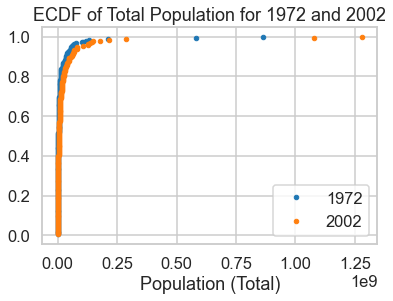

In [54]:
# ECDF of Total Population for first and last year in dataset
x_std_start, y_std_start = ecdf(df['Population (Total)'][df['year'] == 1972])
x_std_end, y_std_end = ecdf(df['Population (Total)'][df['year'] == 2002])

_ = plt.plot(x_std_start, y_std_start, marker = '.', linestyle='none', label='1972')
_ = plt.plot(x_std_end, y_std_end, marker = '.', linestyle='none', label='2002')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('Population (Total)')
_ = plt.title('ECDF of Total Population for 1972 and 2002')
plt.show()

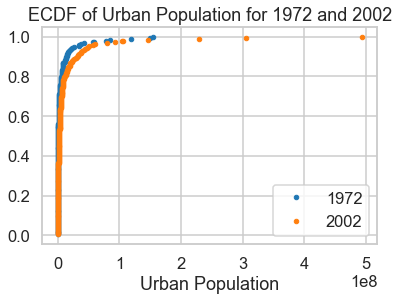

In [55]:
# ECDF of Urban Population for first and last year in dataset
x_std_start, y_std_start = ecdf(df['Urban population'][df['year'] == 1972])
x_std_end, y_std_end = ecdf(df['Urban population'][df['year'] == 2002])

_ = plt.plot(x_std_start, y_std_start, marker = '.', linestyle='none', label='1972')
_ = plt.plot(x_std_end, y_std_end, marker = '.', linestyle='none', label='2002')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('Urban Population')
_ = plt.title('ECDF of Urban Population for 1972 and 2002')
plt.show()

In [56]:
def plotyear(year):
    data = df[df.year == year]
    area = 200 * data['Urban population growth (annual %)'] # Change proportions
    colors = data['World bank region'].map({'South Asia': '#377eb8', 'Europe & Central Asia': '#ff7f00',
                                           'Middle East & North Africa': '#4daf4a', 'East Asia & Pacific': '#f781bf',
                                           'Sub-Saharan Africa': '#a65628', 'Latin America & Caribbean': '#984ea3',
                                           'North America': '#999999'})

    data.plot.scatter('Population (Total)','Urban population', linewidths=1,
                     edgecolors='k', figsize=(12,9), c=colors, s=area, alpha=0.8)
    
    plt.xlabel('Total Population')
    plt.ylabel('Urban Population')
    plt.title('Total Population vs. Urban Population')

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


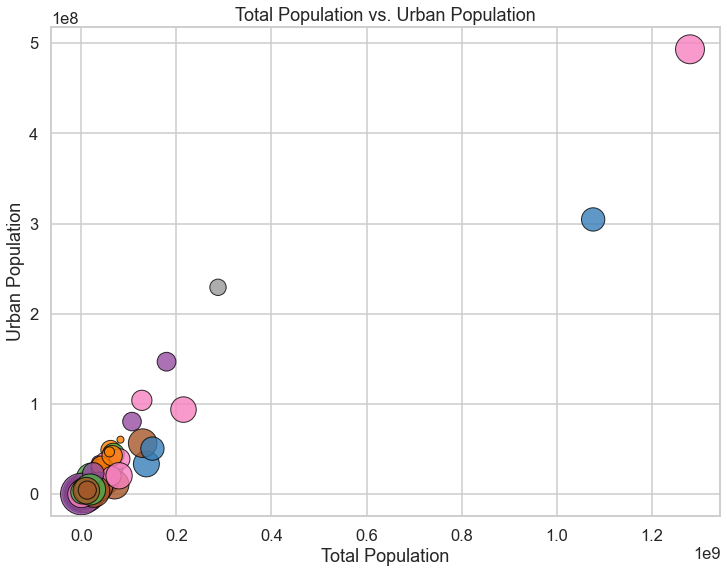

In [57]:
plotyear(2002)

In [58]:
# The code below creates an interactive plot that allows us to move the slider to change the year
interact(plotyear, year=widgets.IntSlider(min=1972, max=2002, 
                                           step=1, value=1972))

interactive(children=(IntSlider(value=1972, description='year', max=2002, min=1972), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

# Data by region

In [59]:
# We create a list of the unique entries in "World bank region"
wb_regions = df['World bank region'].unique().tolist()
wb_regions

['South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'North America']

In [60]:
# We can see how many countries are in each region
countries_per_region = dict(df.groupby('World bank region')['country'].nunique())
countries_per_region

{'East Asia & Pacific': 36,
 'Europe & Central Asia': 56,
 'Latin America & Caribbean': 38,
 'Middle East & North Africa': 21,
 'North America': 3,
 'South Asia': 8,
 'Sub-Saharan Africa': 48}

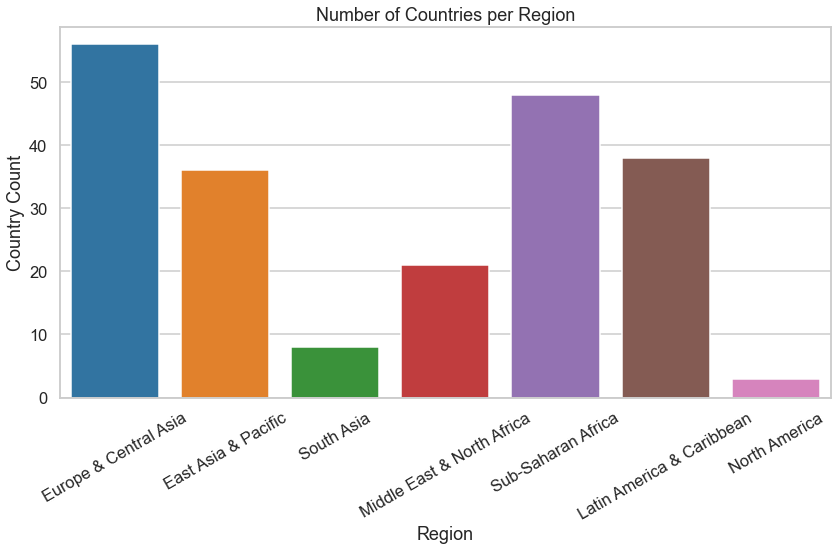

In [61]:
# We can also plot a bar graph to see how the regions stack up
region_keys = list(countries_per_region.keys())
region_values = list(countries_per_region.values())

_ = plt.figure(figsize=(12,8))
_ = sns.barplot(region_keys, region_values, order=['Europe & Central Asia', 'East Asia & Pacific', 
                                                  'South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa',
                                                  'Latin America & Caribbean', 'North America'])
_ = plt.xticks(rotation=30)
_ = plt.xlabel('Region')
_ = plt.ylabel('Country Count')
_ = plt.title('Number of Countries per Region')
plt.tight_layout()
plt.show()

In [62]:
# Total population by region
regional_pop_tot_2002 = dict(df['Population (Total)'][df.year == 2002].groupby(df['World bank region']).sum())
regional_pop_tot_2002

{'East Asia & Pacific': 2057032608.0,
 'Europe & Central Asia': 863676818.0,
 'Latin America & Caribbean': 540028983.0,
 'Middle East & North Africa': 323928401.0,
 'North America': 319050105.0,
 'South Asia': 1429513552.0,
 'Sub-Saharan Africa': 700219447.0}

In [63]:
for key in regional_pop_tot_2002: 
    print("{:.0f}%".format(regional_pop_tot_2002[key]/world_pop_tot_2002*100, 2), 
          "of the world's population was located in the", str(key), "region in 2002")

33% of the world's population was located in the East Asia & Pacific region in 2002
14% of the world's population was located in the Europe & Central Asia region in 2002
9% of the world's population was located in the Latin America & Caribbean region in 2002
5% of the world's population was located in the Middle East & North Africa region in 2002
5% of the world's population was located in the North America region in 2002
23% of the world's population was located in the South Asia region in 2002
11% of the world's population was located in the Sub-Saharan Africa region in 2002


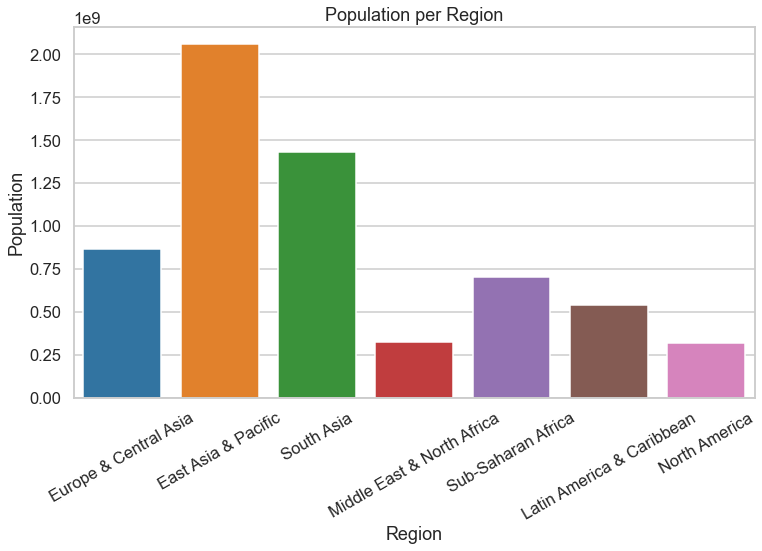

In [64]:
# bar chart based on sum of pop feature instead of country count
_ = plt.figure(figsize=(11,8))
_ = sns.barplot(list(regional_pop_tot_2002.keys()), list(regional_pop_tot_2002.values()), 
                order=['Europe & Central Asia', 'East Asia & Pacific', 'South Asia', 'Middle East & North Africa', 
                       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'])
_ = plt.xticks(rotation=30)
_ = plt.xlabel('Region')
_ = plt.ylabel('Population')
_ = plt.title('Population per Region')
plt.savefig('Population per Region.png')
plt.tight_layout()
plt.show()

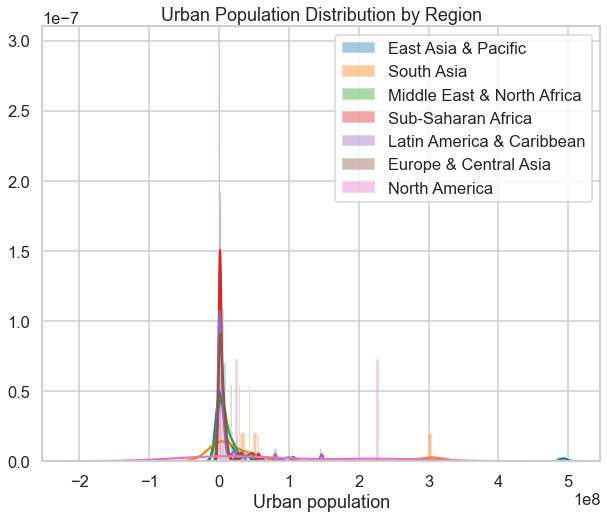

In [65]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'East Asia & Pacific'], bins=50,
                 label='East Asia & Pacific')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'South Asia'], bins=50, label='South Asia')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Middle East & North Africa'], bins=50, 
                 label ='Middle East & North Africa')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Sub-Saharan Africa'], bins=50, 
                 label ='Sub-Saharan Africa')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Latin America & Caribbean'], bins=50, 
                 label ='Latin America & Caribbean')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Europe & Central Asia'], bins=50, 
                 label ='Europe & Central Asia')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'North America'], bins=50, label ='North America')

_ = plt.title('Urban Population Distribution by Region')
plt.legend()
plt.show()

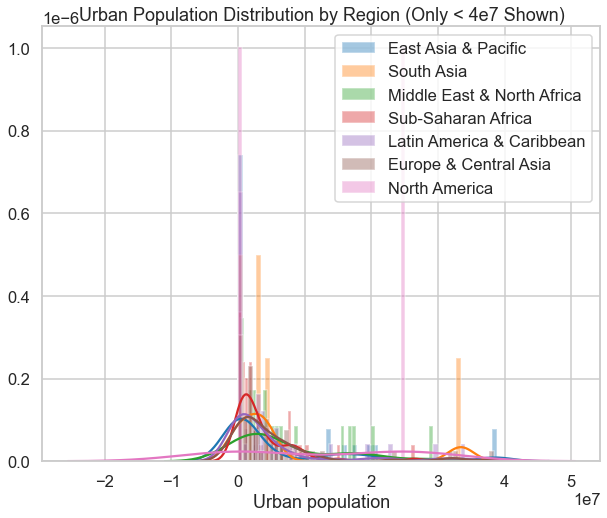

In [66]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'East Asia & Pacific')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50,
                 label='East Asia & Pacific')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'South Asia')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50, label='South Asia')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'Middle East & North Africa')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50, 
                 label ='Middle East & North Africa')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'Sub-Saharan Africa')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50, 
                 label ='Sub-Saharan Africa')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'Latin America & Caribbean')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50, 
                 label ='Latin America & Caribbean')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'Europe & Central Asia')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50, 
                 label ='Europe & Central Asia')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank region'] == 'North America')
                     & (urban_pop_perc_2002['Urban population'] < 4e7)], bins=50, label ='North America')
_ = plt.title('Urban Population Distribution by Region (Only < 4e7 Shown)')
plt.legend()
plt.show()

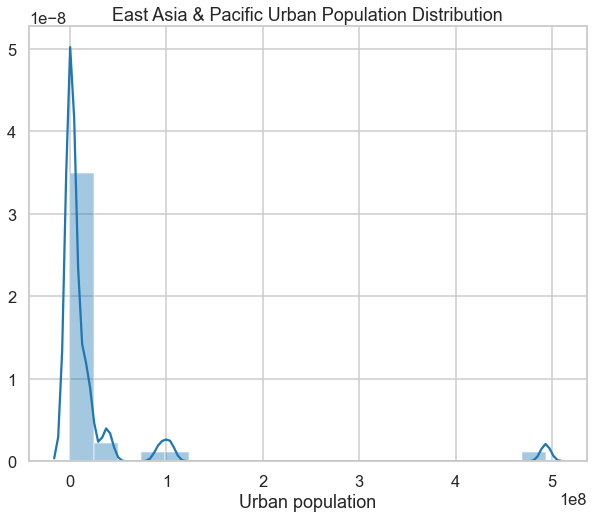

In [67]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'East Asia & Pacific'], bins=20)
_ = plt.title('East Asia & Pacific Urban Population Distribution')
plt.show()

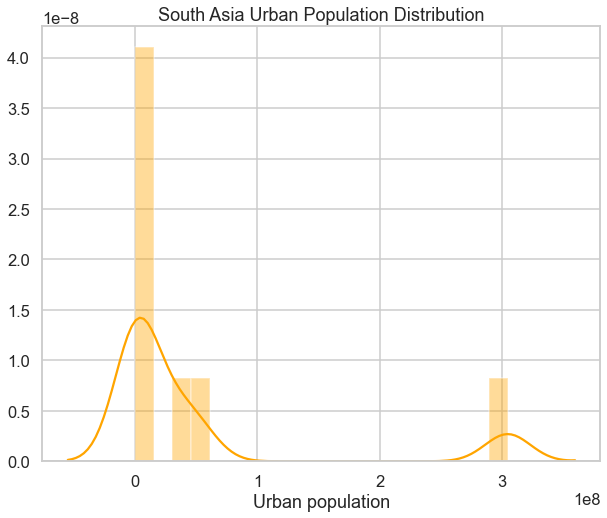

In [68]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'South Asia'], bins=20, color='orange')
_ = plt.title('South Asia Urban Population Distribution')
plt.show()

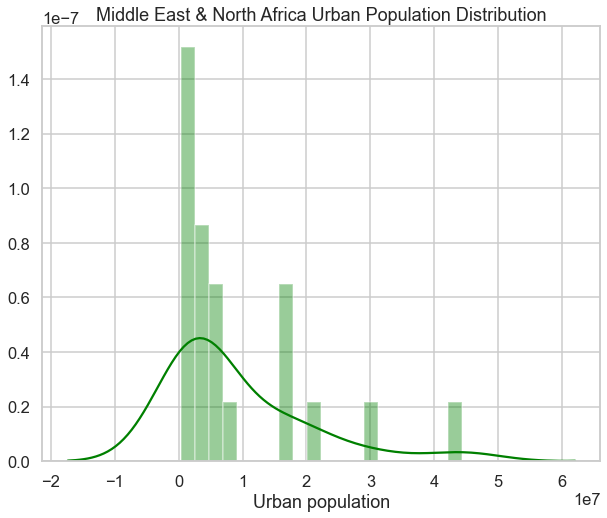

In [69]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Middle East & North Africa'], bins=20, color='green')
_ = plt.title('Middle East & North Africa Urban Population Distribution')

plt.show()

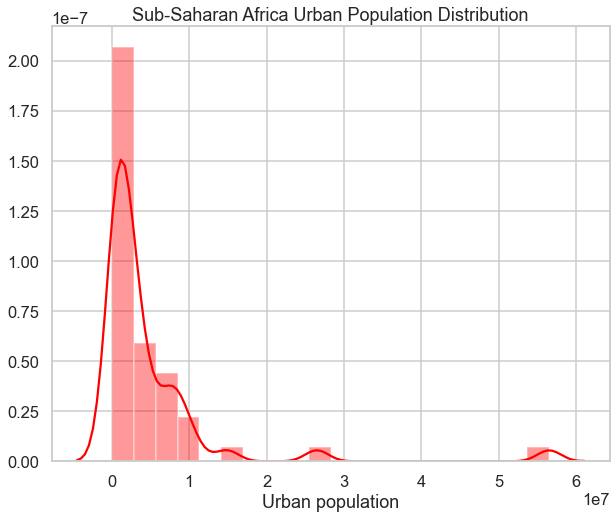

In [70]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Sub-Saharan Africa'], bins=20, color='red')
_ = plt.title('Sub-Saharan Africa Urban Population Distribution')
plt.show()

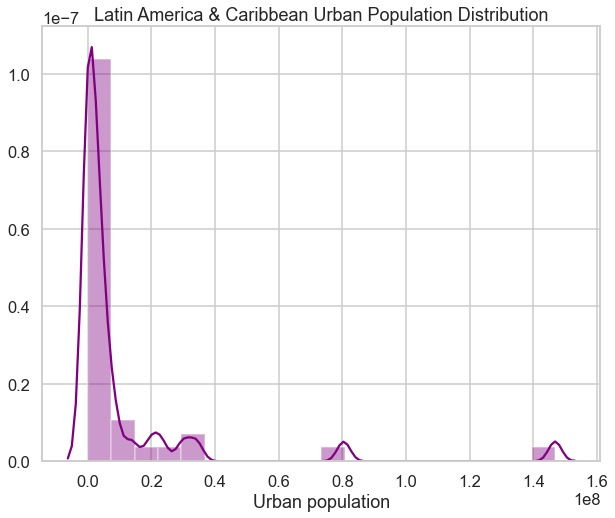

In [71]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Latin America & Caribbean'], bins=20, color='purple')
_ = plt.title('Latin America & Caribbean Urban Population Distribution')
plt.show()

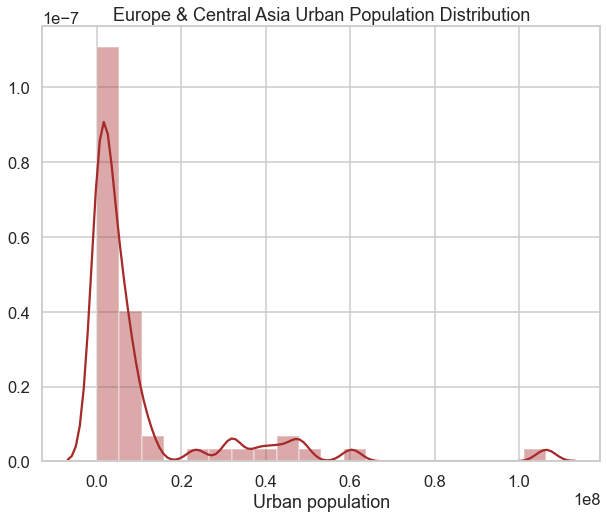

In [72]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'Europe & Central Asia'], bins=20, color='brown')
_ = plt.title('Europe & Central Asia Urban Population Distribution')
plt.show()

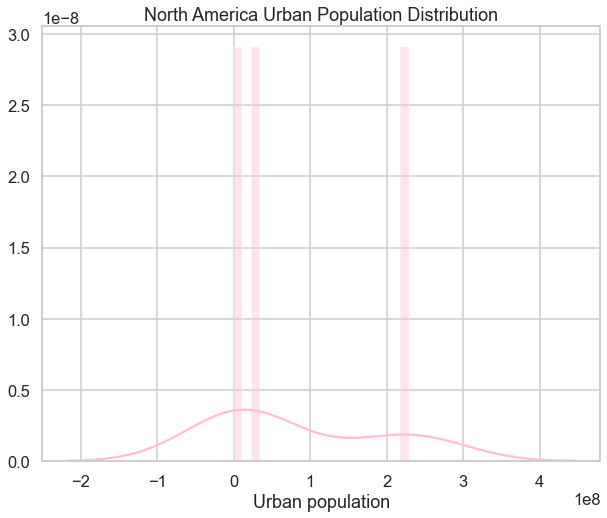

In [73]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank region'] == 'North America'], bins=20, color='pink')
_ = plt.title('North America Urban Population Distribution')
plt.show()

In [74]:
region_year = df.groupby(['World bank region', 'year'], as_index=False).mean()
region_year

,World bank region,year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,East Asia & Pacific,1972,2.376767e+07,2.857678e+07,3.718566e+07,2.397581,533.174422,56.599411,43.400589,2.784846e+07,9.337198e+06,3.425587,1.076396e+07
1,East Asia & Pacific,1973,4.719215e+07,5.543890e+07,3.801573e+07,2.295845,537.804051,56.085422,43.914578,2.842408e+07,9.591654e+06,3.163113,1.108756e+07
2,East Asia & Pacific,1974,7.493609e+07,2.545059e+08,3.884021e+07,2.178689,540.798573,55.571433,44.428567,2.897133e+07,9.868888e+06,2.816442,1.142073e+07
3,East Asia & Pacific,1975,5.113908e+07,3.281484e+08,3.958458e+07,1.972965,544.445167,55.057444,44.942556,2.945685e+07,1.012773e+07,2.224506,1.175420e+07
4,East Asia & Pacific,1976,6.617770e+07,3.971758e+08,4.024638e+07,1.665427,546.012883,54.671939,45.328061,2.980208e+07,1.044430e+07,3.312721,1.219939e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Sub-Saharan Africa,1998,1.338435e+07,1.768939e+08,1.312151e+07,2.755472,70.368442,66.523587,33.476413,9.019798e+06,4.101712e+06,4.075606,4.965176e+06
213,Sub-Saharan Africa,1999,1.043625e+07,2.499881e+08,1.347487e+07,2.728549,72.338556,66.143096,33.856904,9.213063e+06,4.261806e+06,4.009420,5.154985e+06
214,Sub-Saharan Africa,2000,1.611706e+07,4.897455e+08,1.383849e+07,2.629505,74.179098,65.762604,34.237396,9.410219e+06,4.428269e+06,3.875116,5.352041e+06
215,Sub-Saharan Africa,2001,1.440958e+07,4.235934e+08,1.420831e+07,2.533223,75.917126,65.363400,34.636600,9.606087e+06,4.602225e+06,3.807134,5.560592e+06


In [75]:
e_asia_pacific = df['Urban population'].loc[df['World bank region'] == 'East Asia & Pacific']
eu_cent_asia = df['Urban population'].loc[df['World bank region'] == 'Europe & Central Asia']
lat_am_carib = df['Urban population'].loc[df['World bank region'] == 'Latin America & Caribbean']
mid_east_n_africa = df['Urban population'].loc[df['World bank region'] == 'Middle East & North Africa']
n_america = df['Urban population'].loc[df['World bank region'] == 'North America']
s_asia = df['Urban population'].loc[df['World bank region'] == 'South Asia']
sub_saharan_africa = df['Urban population'].loc[df['World bank region'] == 'Sub-Saharan Africa']
regions_list = [e_asia_pacific, eu_cent_asia, lat_am_carib, mid_east_n_africa, n_america, s_asia, sub_saharan_africa]

Our null hypothesis is that there is no distinguishable difference between observations in one region and observations in another. Our alternative hypothesis is that there is a distinguishable difference between the observations in two different groups. We will test our hypothesis with a t-test below.

In [76]:
# Performing a t-test
for (x, y) in combinations(regions_list, 2):
    print(ttest_ind(x, y, equal_var=False))

Ttest_indResult(statistic=3.758064053059629, pvalue=0.00017887791398298207)
Ttest_indResult(statistic=4.9395102118281615, pvalue=8.769286276920863e-07)
Ttest_indResult(statistic=6.077748888419763, pvalue=1.6314257137002197e-09)
Ttest_indResult(statistic=-5.952090768758806, pvalue=4.137256764281877e-08)
Ttest_indResult(statistic=-3.648437470960085, pvalue=0.0003092648167930066)
Ttest_indResult(statistic=8.37394836601575, pvalue=1.6258113207705949e-16)
Ttest_indResult(statistic=2.9527718003919907, pvalue=0.0031799202395374347)
Ttest_indResult(statistic=6.633436247955836, pvalue=4.09008479939325e-11)
Ttest_indResult(statistic=-6.725307903703273, pvalue=1.4301828119023006e-09)
Ttest_indResult(statistic=-5.219561303031494, pvalue=3.752639510891536e-07)
Ttest_indResult(statistic=15.316601947616295, pvalue=2.871062466917785e-50)
Ttest_indResult(statistic=2.2680463186315456, pvalue=0.023449714845955417)
Ttest_indResult(statistic=-6.958436907875952, pvalue=4.794797902252328e-10)
Ttest_indResult

In [77]:
# Here we see that when performing the t-test on the two regions that contain the two outliers and are also
# geographically nearby with some history of overlapping cultures, the p-value is much higher.
ttest_ind(e_asia_pacific, s_asia, equal_var=False)

Ttest_indResult(statistic=-3.648437470960085, pvalue=0.0003092648167930066)

In [78]:
ttest_ind(mid_east_n_africa, sub_saharan_africa, equal_var=False)

Ttest_indResult(statistic=9.727789453840447, pvalue=2.5042926961512054e-21)

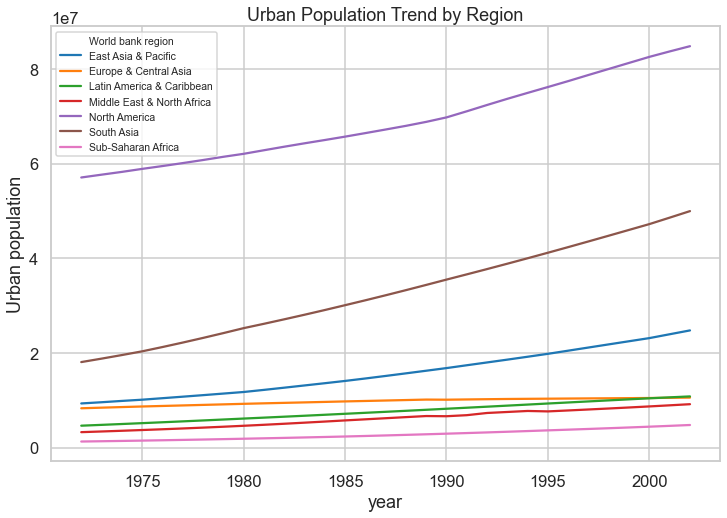

In [79]:
_ = plt.figure(figsize=(12,8))
_ = sns.lineplot(x='year', y='Urban population', hue='World bank region', data=region_year)
_ = plt.legend(fontsize='xx-small')
_ = plt.title('Urban Population Trend by Region')
plt.show()

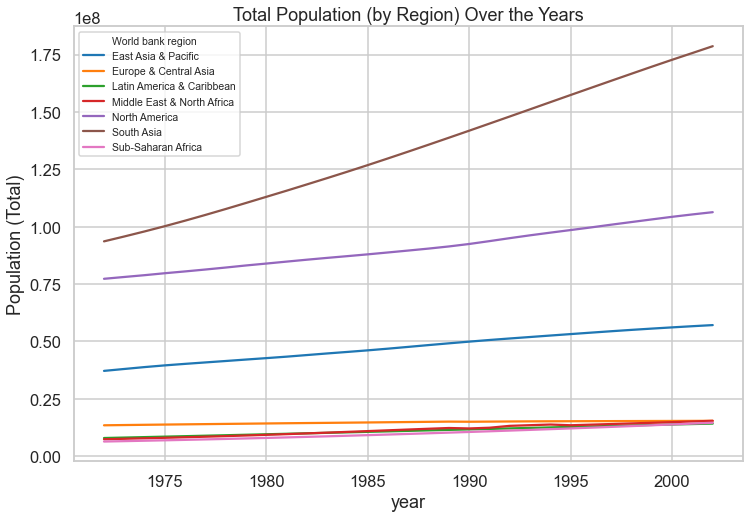

In [80]:
_ = plt.figure(figsize=(12,8))
_ = sns.lineplot(x='year', y='Population (Total)', hue='World bank region', data=region_year)
_ = plt.legend(fontsize='xx-small')
_ = plt.title('Total Population (by Region) Over the Years')
plt.show()

In [81]:
# If we are curious, we can see which countries are in a specific region as below
df['country'][df['World bank region'] == 'North America'].unique()

array(['Bermuda', 'Canada', 'United States'], dtype=object)

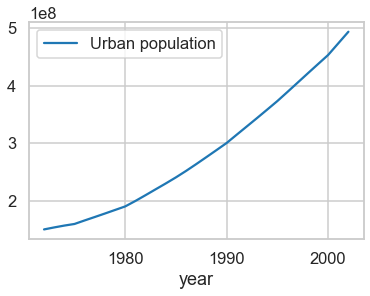

In [82]:
# Can single out a country by: 
country = df.query('country == "China"')
country.plot("year", "Urban population")

# Data by income

In [83]:
wb_income = df['World bank, 4 income groups 2017'].unique().tolist()
wb_income

['Low income', 'Upper middle income', 'High income', 'Lower middle income']

In [84]:
# We can also see how many countries are in each income level group
countries_per_income_level = dict(df.groupby('World bank, 4 income groups 2017')['country'].nunique())
countries_per_income_level

{'High income': 72,
 'Low income': 31,
 'Lower middle income': 52,
 'Upper middle income': 55}

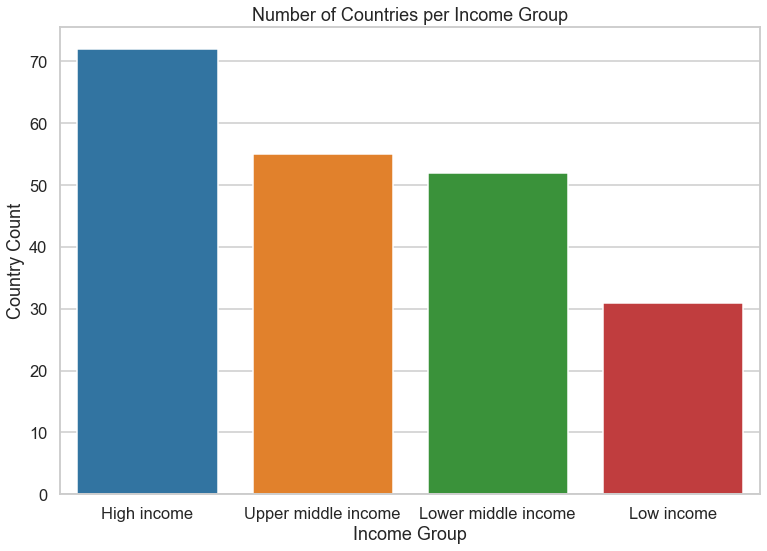

In [85]:
# We can create a plot to visualize how many countries are in each income group
income_keys = list(countries_per_income_level.keys())
income_values = list(countries_per_income_level.values())

_ = plt.figure(figsize=(11,8))
_ = sns.barplot(income_keys, income_values, order=['High income', 'Upper middle income', 'Lower middle income', 
                                                   'Low income'])
_ = plt.xlabel('Income Group')
_ = plt.ylabel('Country Count')
_ = plt.title('Number of Countries per Income Group')
plt.tight_layout()
plt.show()

In [86]:
# Total Popupulation Numbers by Income
income_pop_tot_2002 = dict(df['Population (Total)'][df.year == 2002].groupby(df['World bank, 4 income groups 2017'])
                           .sum())
income_pop_tot_2002

{'High income': 1061860535.0,
 'Low income': 446026847.0,
 'Lower middle income': 2401753297.0,
 'Upper middle income': 2323809235.0}

In [87]:
for key in income_pop_tot_2002: 
    print("{:.0f}%".format(income_pop_tot_2002[key]/world_pop_tot_2002*100, 2), 
          "of the world's population was in the", key, "country bracket in 2002")

17% of the world's population was in the High income country bracket in 2002
7% of the world's population was in the Low income country bracket in 2002
39% of the world's population was in the Lower middle income country bracket in 2002
37% of the world's population was in the Upper middle income country bracket in 2002


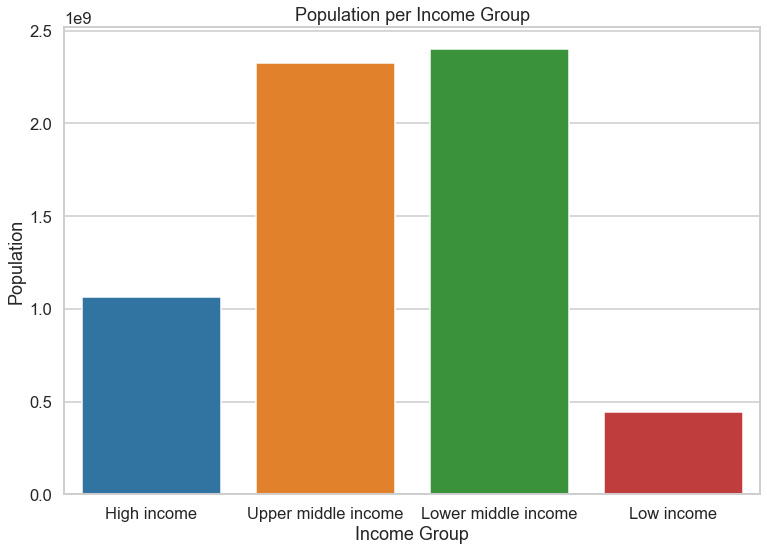

In [88]:
# We can create a plot to visualize how many countries are in each income group
income_keys = list(countries_per_income_level.keys())
income_values = list(countries_per_income_level.values())

_ = plt.figure(figsize=(11,8))
_ = sns.barplot(list(income_pop_tot_2002.keys()), list(income_pop_tot_2002.values()), 
                order=['High income', 'Upper middle income', 'Lower middle income', 'Low income'])
_ = plt.xlabel('Income Group')
_ = plt.ylabel('Population')
_ = plt.title('Population per Income Group')
plt.tight_layout()
plt.savefig('Population per Income Group.png')
plt.show()

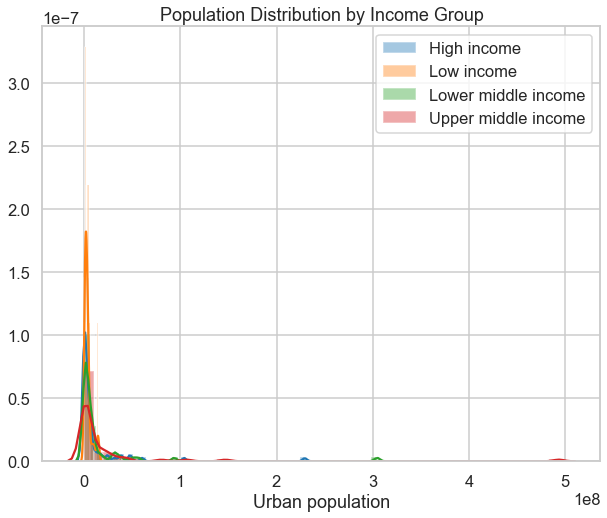

In [89]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'High income'], bins=50,
                 label='High income')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Low income'], bins=50, 
                 label='Low income')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Lower middle income'], bins=50, 
                 label ='Lower middle income')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Upper middle income'], bins=50, 
                 label ='Upper middle income')
_ = plt.title('Population Distribution by Income Group')
plt.legend()
plt.show()

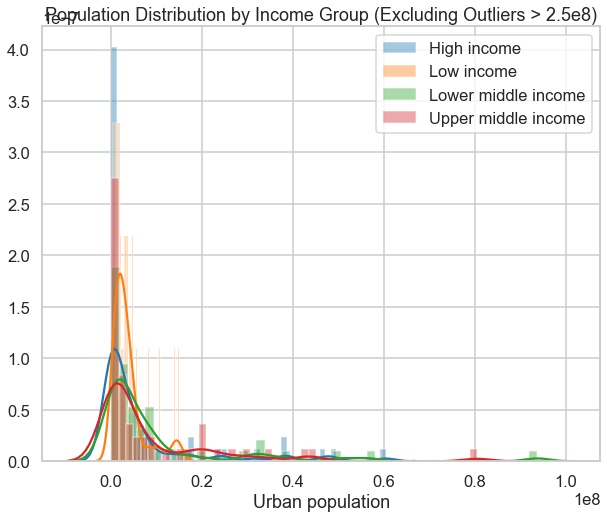

In [90]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'High income')
                     & (urban_pop_perc_2002['Urban population'] < 1e8)], bins=50,
                 label='High income')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Low income')
                     & (urban_pop_perc_2002['Urban population'] < 1e8)], bins=50, 
                 label='Low income')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Lower middle income')
                     & (urban_pop_perc_2002['Urban population'] < 1e8)], bins=50, 
                 label ='Lower middle income')
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[(urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Upper middle income')
                     & (urban_pop_perc_2002['Urban population'] < 1e8)], bins=50, 
                 label ='Upper middle income')
_ = plt.title('Population Distribution by Income Group (Excluding Outliers > 2.5e8)')
plt.legend()
plt.show()

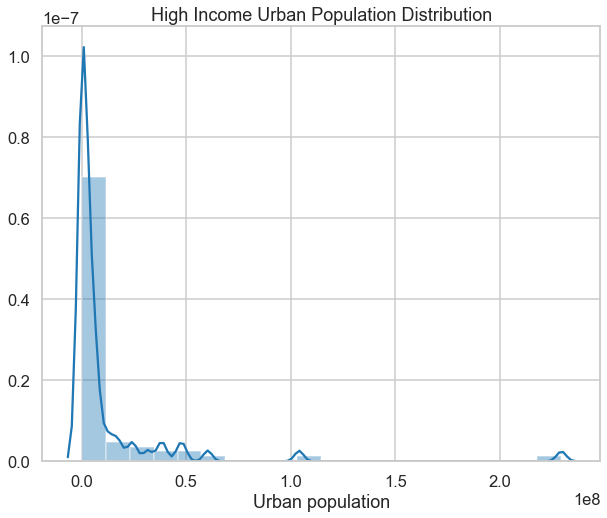

In [91]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'High income'], bins=20,
                 label='High income')
_ = plt.title('High Income Urban Population Distribution')
plt.show()

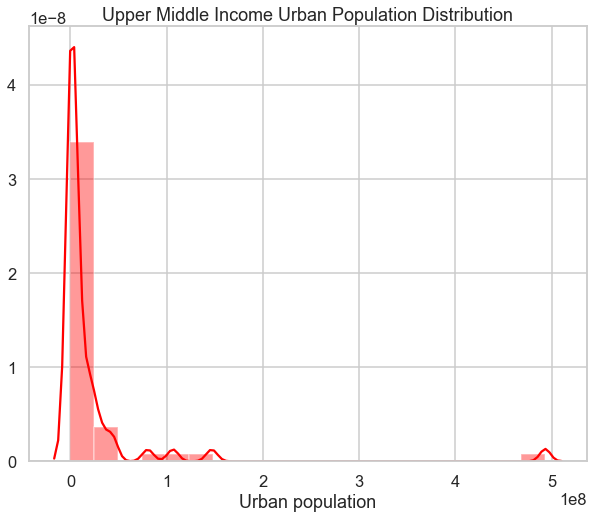

In [92]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Upper middle income'], bins=20,
                 label='High income', color='red')
_ = plt.title('Upper Middle Income Urban Population Distribution')
plt.show()

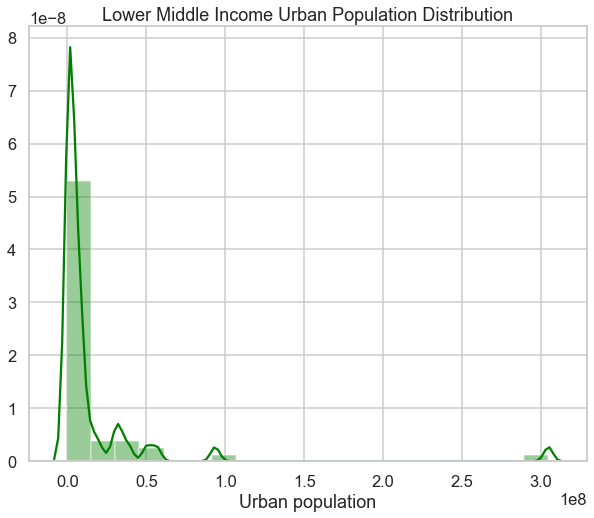

In [93]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Lower middle income'], bins=20,
                 label='High income', color='green')
_ = plt.title('Lower Middle Income Urban Population Distribution')
plt.show()

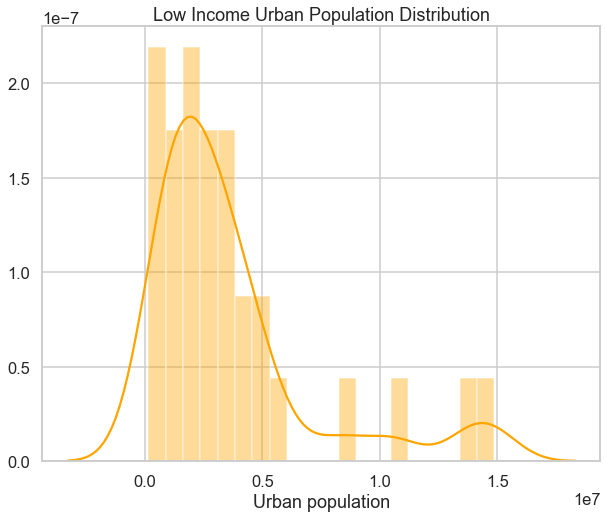

In [94]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(urban_pop_perc_2002['Urban population']
                 .loc[urban_pop_perc_2002['World bank, 4 income groups 2017'] == 'Low income'], bins=20,
                 label='High income', color='orange')
_ = plt.title('Low Income Urban Population Distribution')
plt.show()

In [95]:
income_year = df.groupby(['World bank, 4 income groups 2017', 'year'], as_index=False).mean()
income_year

,"World bank, 4 income groups 2017",year,Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,High income,1972,3.465747e+07,2.162264e+08,1.178996e+07,1.973140,532.963769,34.797439,65.202561,3.574704e+06,8.215256e+06,2.943833,8.780447e+06
1,High income,1973,7.494475e+07,3.400483e+08,1.189617e+07,2.011452,538.876237,34.236047,65.763953,3.564394e+06,8.331772e+06,2.956654,8.883716e+06
2,High income,1974,1.135059e+08,1.194020e+09,1.201717e+07,1.924697,543.962370,33.674656,66.325344,3.557202e+06,8.459969e+06,2.845245,8.990461e+06
3,High income,1975,6.776935e+07,1.131033e+09,1.213268e+07,1.822524,549.241657,33.113264,66.886736,3.548750e+06,8.583925e+06,2.720147,9.095011e+06
4,High income,1976,6.966476e+07,1.316821e+09,1.222767e+07,1.636394,553.244221,32.653650,67.346350,3.547791e+06,8.679878e+06,2.379026,9.196645e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Upper middle income,1998,1.242590e+08,1.676085e+09,4.072353e+07,1.136058,109.882992,43.748924,56.251076,2.080547e+07,1.991807e+07,1.801406,2.262876e+07
120,Upper middle income,1999,1.072247e+08,2.133326e+09,4.114133e+07,1.190763,111.072435,43.382662,56.617338,2.071053e+07,2.043080e+07,1.846003,2.319000e+07
121,Upper middle income,2000,1.519813e+08,4.373771e+09,4.153448e+07,1.084174,112.191031,43.016400,56.983600,2.059618e+07,2.093831e+07,1.730452,2.375618e+07
122,Upper middle income,2001,1.314196e+08,3.901273e+09,4.190122e+07,1.042151,113.357581,42.671822,57.328178,2.039762e+07,2.150360e+07,1.659378,2.432754e+07


In [96]:
low_income = df['Urban population'].loc[df['World bank, 4 income groups 2017'] == 'Low income']
lower_mid_income = df['Urban population'].loc[df['World bank, 4 income groups 2017'] == 'Lower middle income']
upper_mid_income = df['Urban population'].loc[df['World bank, 4 income groups 2017'] == 'Upper middle income']
high_income = df['Urban population'].loc[df['World bank, 4 income groups 2017'] == 'High income']
income_groups = [low_income, lower_mid_income, upper_mid_income, high_income]

In [97]:
# Performing a t-test
for (x, y) in combinations(income_groups, 2):
    print(ttest_ind(x, y, equal_var=False))

Ttest_indResult(statistic=-10.673565271695102, pvalue=9.34962205414416e-26)
Ttest_indResult(statistic=-11.753065713728338, pvalue=1.0041564237655659e-30)
Ttest_indResult(statistic=-13.69113161656419, pvalue=4.243699114187797e-41)
Ttest_indResult(statistic=-3.426956743643441, pvalue=0.0006186026555457015)
Ttest_indResult(statistic=0.6364782202033037, pvalue=0.5245121265743573)
Ttest_indResult(statistic=4.2357643954965765, pvalue=2.3588456799174375e-05)


In [98]:
ttest_ind(lower_mid_income, high_income, equal_var=False)

Ttest_indResult(statistic=0.6364782202033037, pvalue=0.5245121265743573)

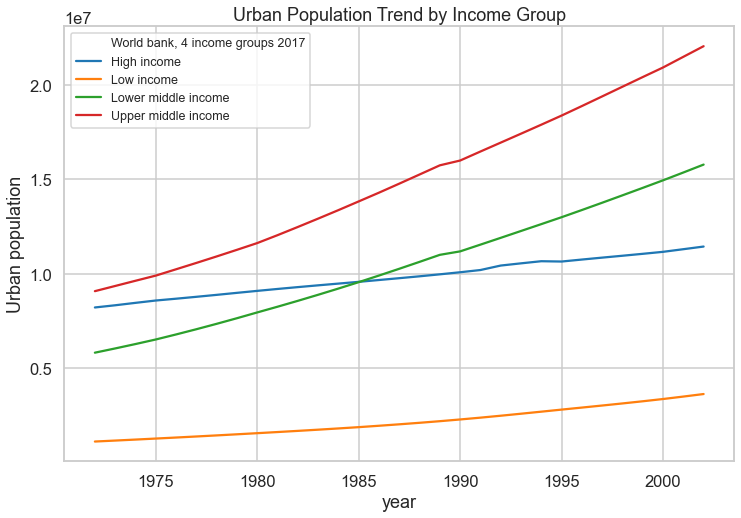

In [99]:
_ = plt.figure(figsize=(12,8))
_ = sns.lineplot(x='year', y='Urban population', hue='World bank, 4 income groups 2017', data=income_year)
_ = plt.legend(fontsize='x-small')
_ = plt.title('Urban Population Trend by Income Group')
plt.show()

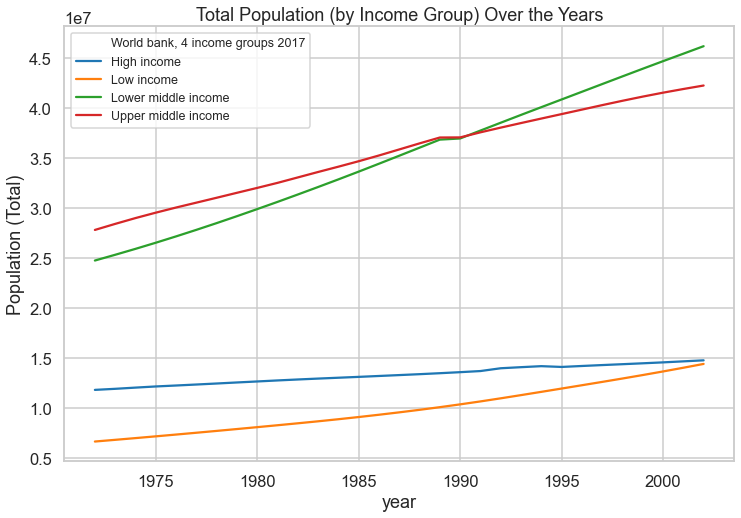

In [100]:
_ = plt.figure(figsize=(12,8))
_ = sns.lineplot(x='year', y='Population (Total)', hue='World bank, 4 income groups 2017', data=income_year)
_ = plt.legend(fontsize='x-small')
_ = plt.title('Total Population (by Income Group) Over the Years')
plt.show()

### Lineplots

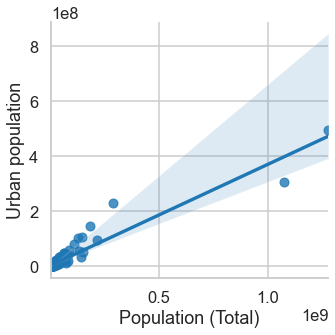

In [101]:
_ = sns.lmplot(x='Population (Total)', y='Urban population', data=df[df.year == 2002])
plt.show()

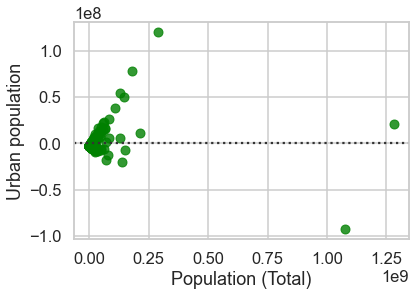

In [102]:
_ = sns.residplot(x='Population (Total)', y='Urban population', data=df[df.year == 2002], color='green')
plt.show()

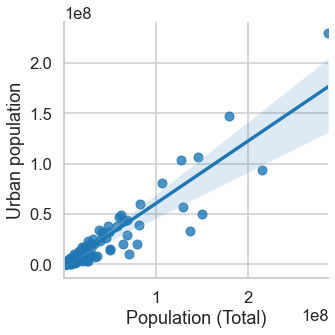

In [103]:
# Excluding the outliers > 1e9 (China and India)
_ = sns.lmplot(x='Population (Total)', y='Urban population', 
               data=df[(df.year == 2002) & (df['Population (Total)'] < 1e9)])
plt.show()

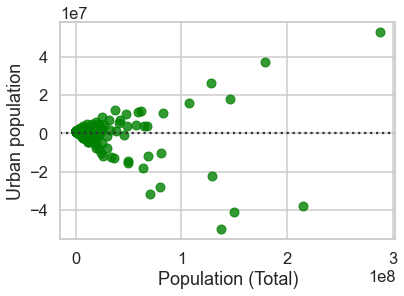

In [104]:
_ = sns.residplot(x='Population (Total)', y='Urban population', 
              data=df[(df.year == 2002) & (df['Population (Total)'] < 1e9)], color='green')
plt.show()

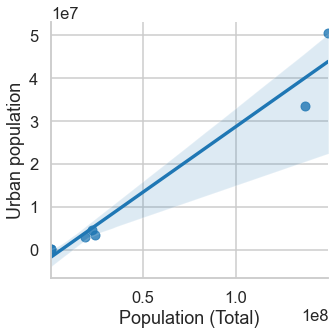

In [105]:
_ = sns.lmplot(x='Population (Total)', y='Urban population', data=df[(df['World bank region'] == "South Asia") 
          & (df.year == 2002) & (df['Population (Total)'] < 1e9)])
plt.show()

## Visualizing Trends in Various Countries

### Most Populous Countries (as of 2002)

In [106]:
cols = df.columns

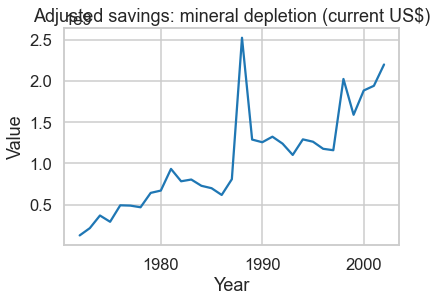

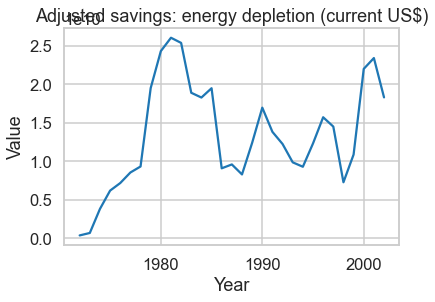

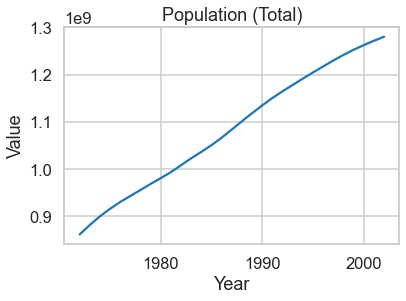

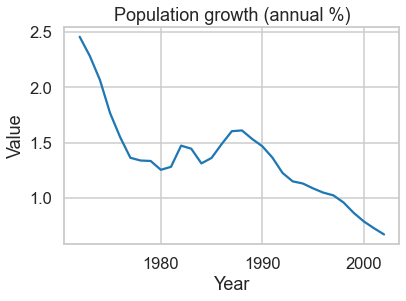

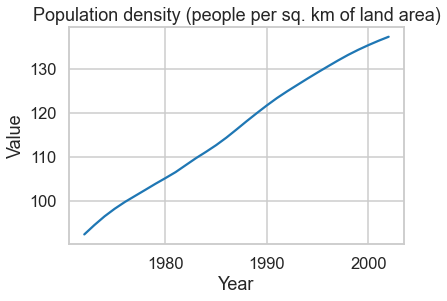

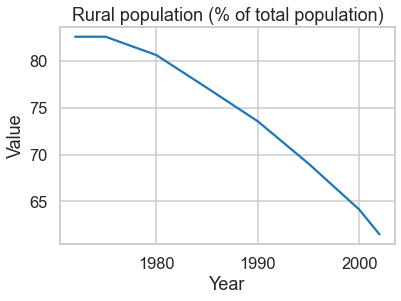

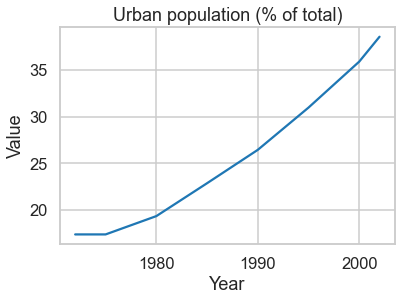

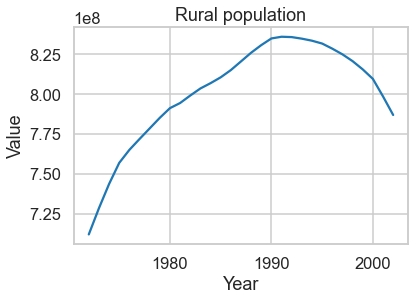

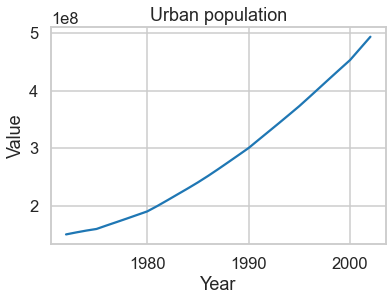

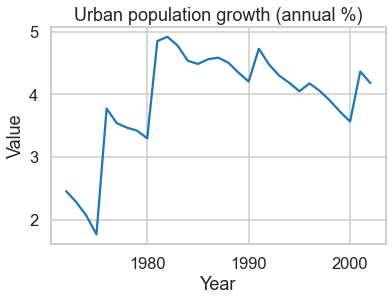

In [107]:
# China

for series_name in cols[4:-1]:
    _ = plt.plot(df[df['country'] == 'China']['year'], 
             df[df['country'] == 'China'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()

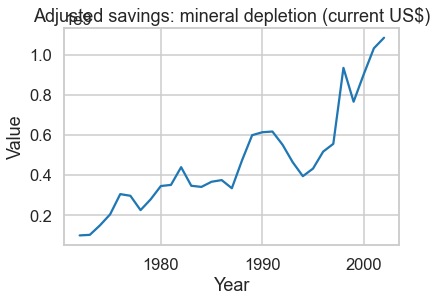

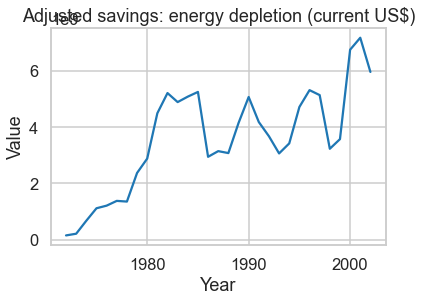

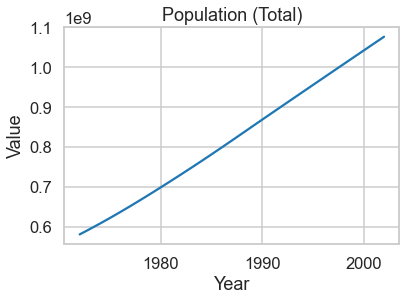

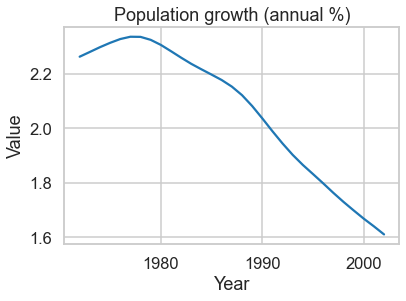

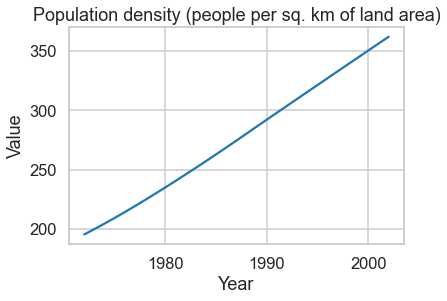

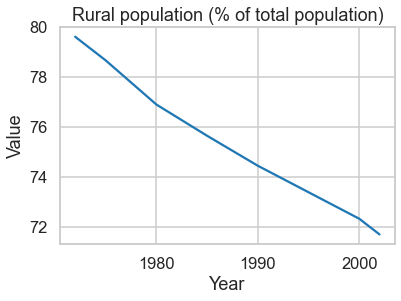

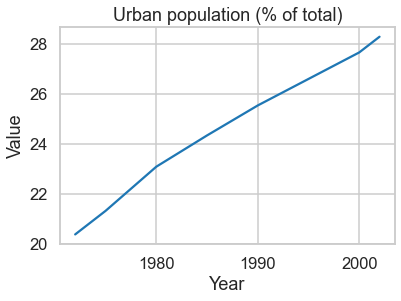

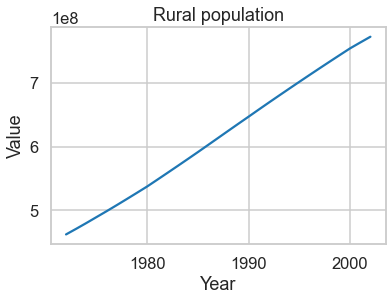

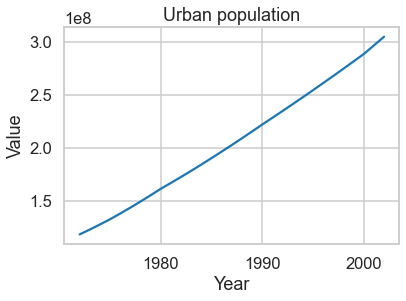

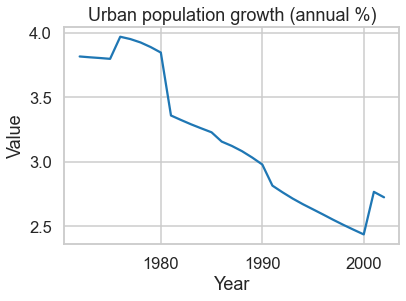

In [108]:
# India

for series_name in cols[4:-1]:
    _ = plt.plot(df[df['country'] == 'India']['year'], 
             df[df['country'] == 'India'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()

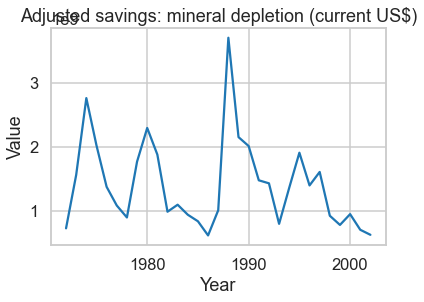

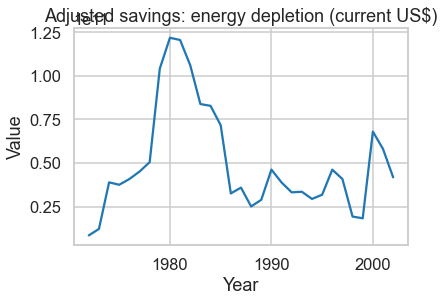

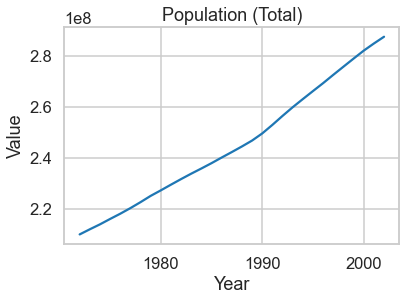

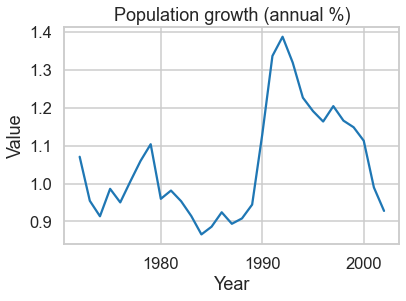

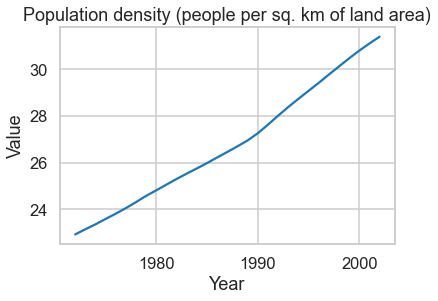

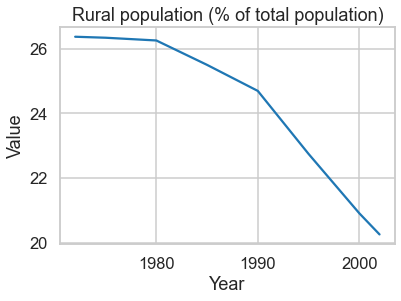

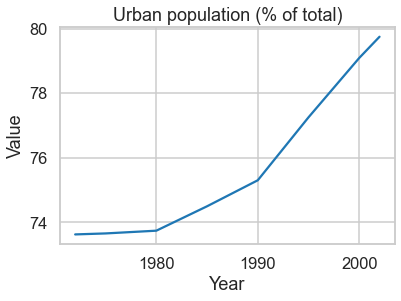

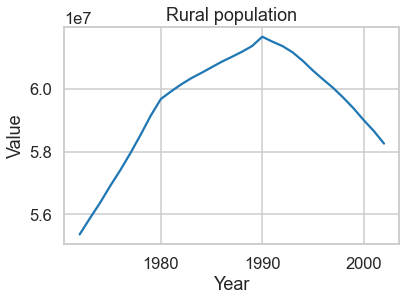

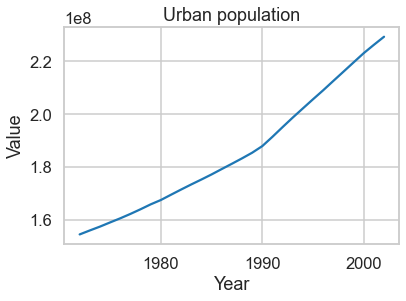

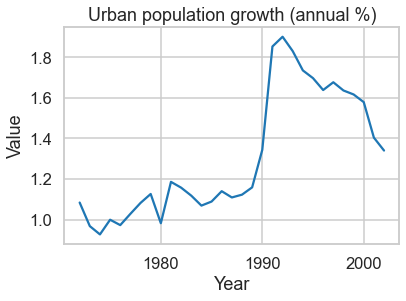

In [109]:
# United States

for series_name in cols[4:-1]:
    _ = plt.plot(df[df['country'] == 'United States']['year'], 
             df[df['country'] == 'United States'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()

### Least Populous Countries (as of 2002)

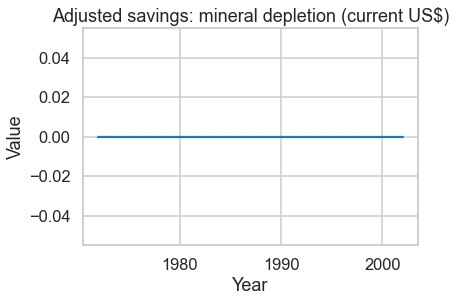

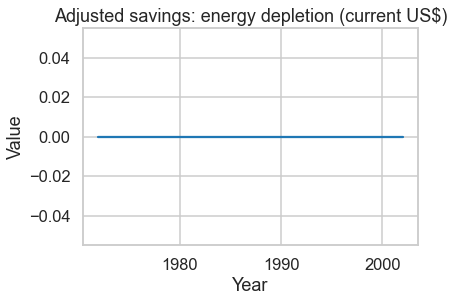

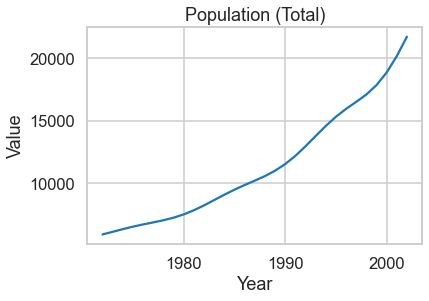

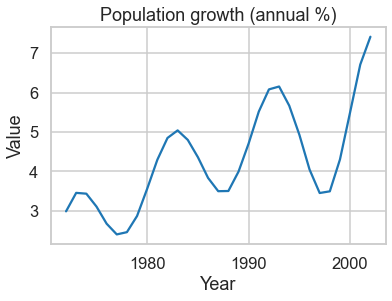

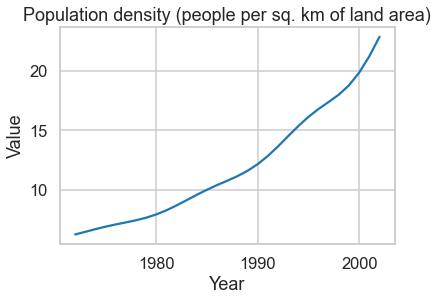

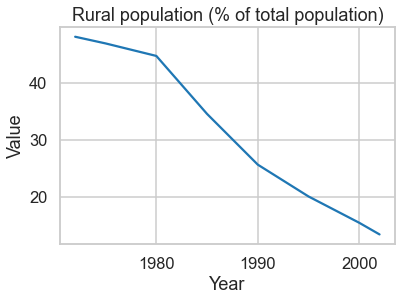

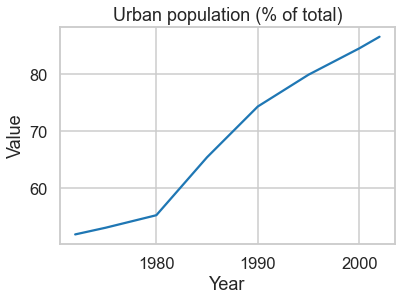

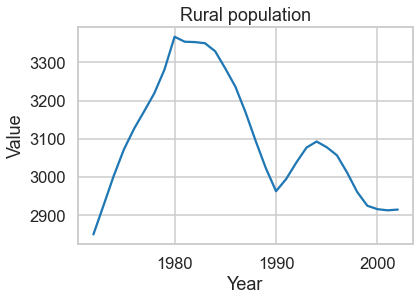

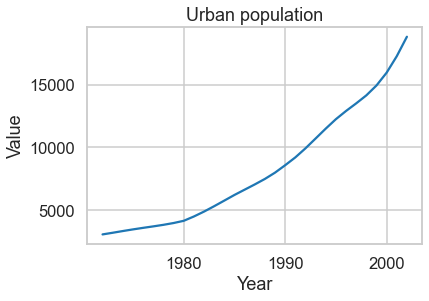

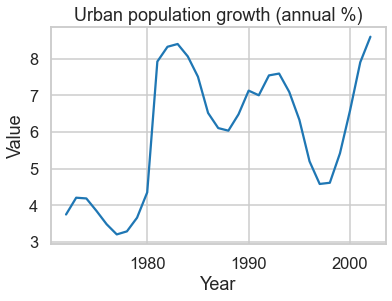

In [110]:
# Turks and Caicos Islands

for series_name in cols[4:-1]:
    _ = plt.plot(df[df['country'] == 'Turks and Caicos Islands']['year'], 
             df[df['country'] == 'Turks and Caicos Islands'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()

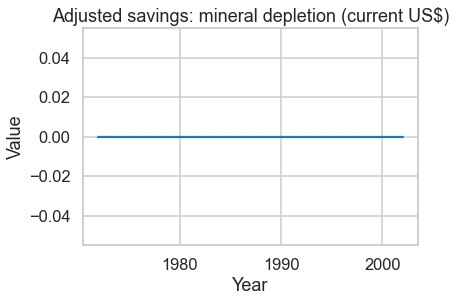

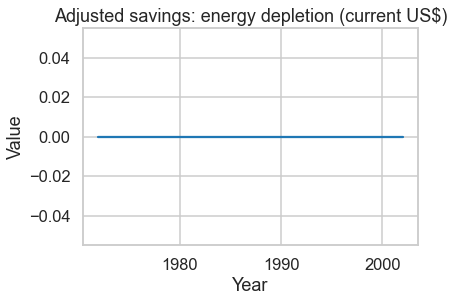

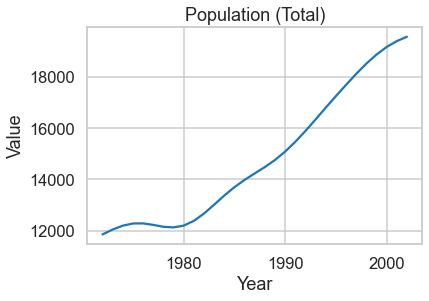

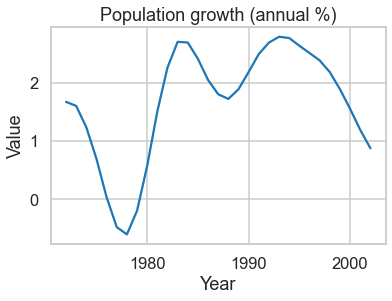

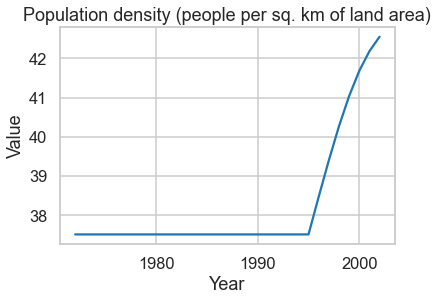

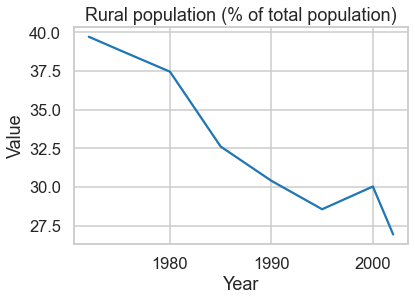

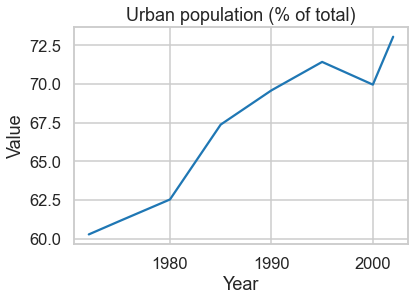

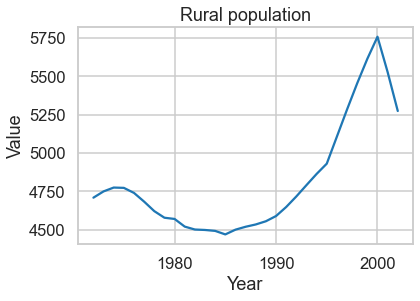

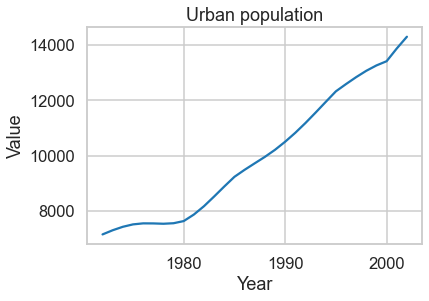

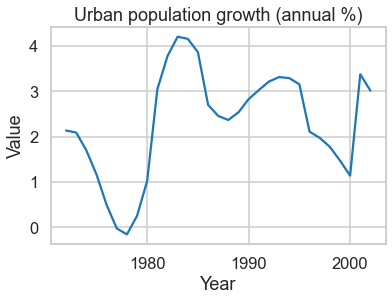

In [111]:
# Palau

for series_name in cols[4:-1]:
    _ = plt.plot(df[df['country'] == 'Palau']['year'], 
             df[df['country'] == 'Palau'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()

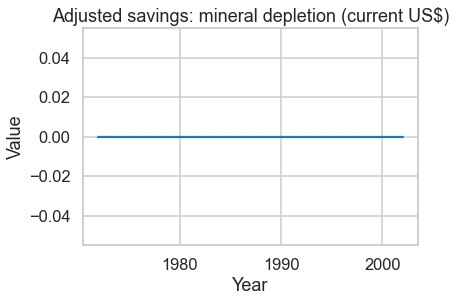

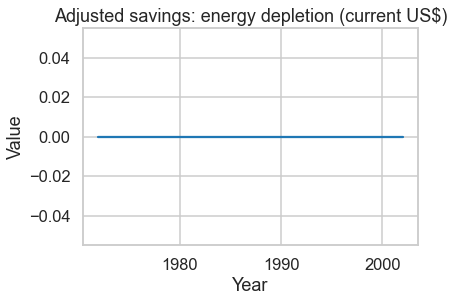

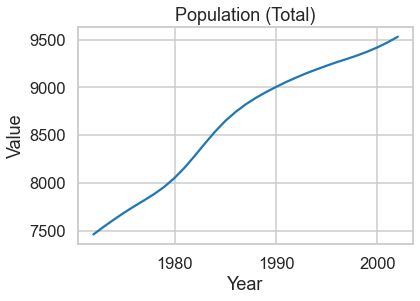

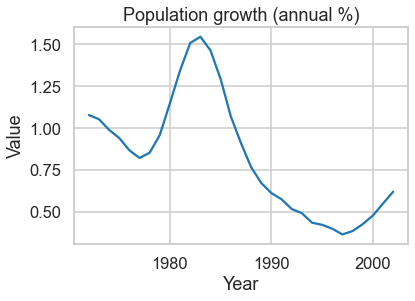

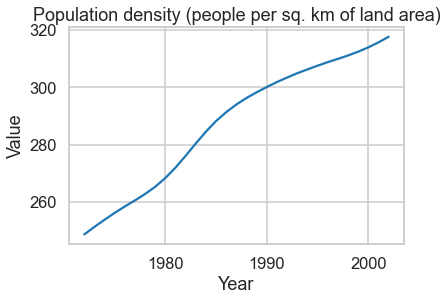

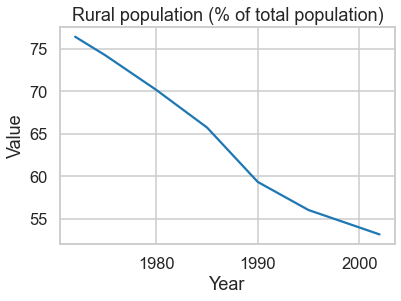

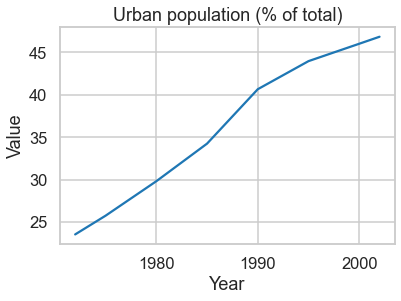

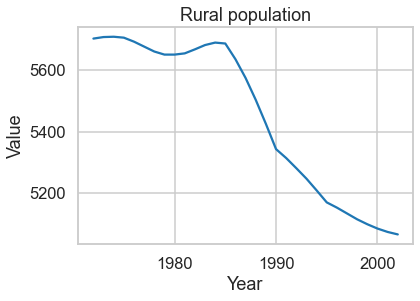

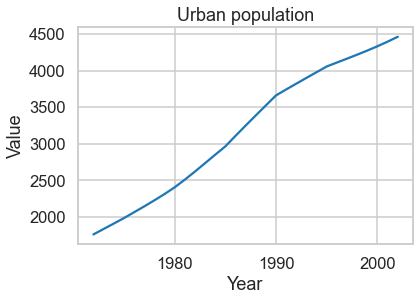

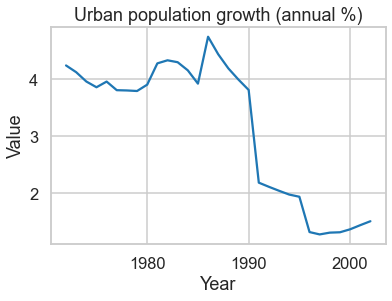

In [112]:
# Tuvalu

for series_name in cols[4:-1]:
    _ = plt.plot(df[df['country'] == 'Tuvalu']['year'], 
             df[df['country'] == 'Tuvalu'][series_name])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Value')
    _ = plt.title(series_name)
    plt.show()